# Testing Regularization on MNIST with LeNet

## Imports and data loading

In [1]:
import torch
import jupyter_black
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet
from tools import train
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_weight_distributions,
    plot_activation_maps,
    plot_predicted_probabilities,
)

jupyter_black.load()

c:\Users\aslak\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading MNIST dataset
in_channels = 1
train_loader, test_loader = data_loader_MNIST()
summary_model = LeNet(lr=0.01, momentum=0.9, in_channels=in_channels).to(device)
summary(summary_model, (in_channels, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
---------------------------------------------

## Hyperparameters

In [4]:
lr = 0.01
momentum = 0.9

## No regularization

### Training

In [21]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 1
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0


100%|██████████| 1/1 [00:29<00:00, 29.65s/it]

Accuracy of the network on the test images: 86 %


### Visualization

#### Plot of Losses and Accuracies

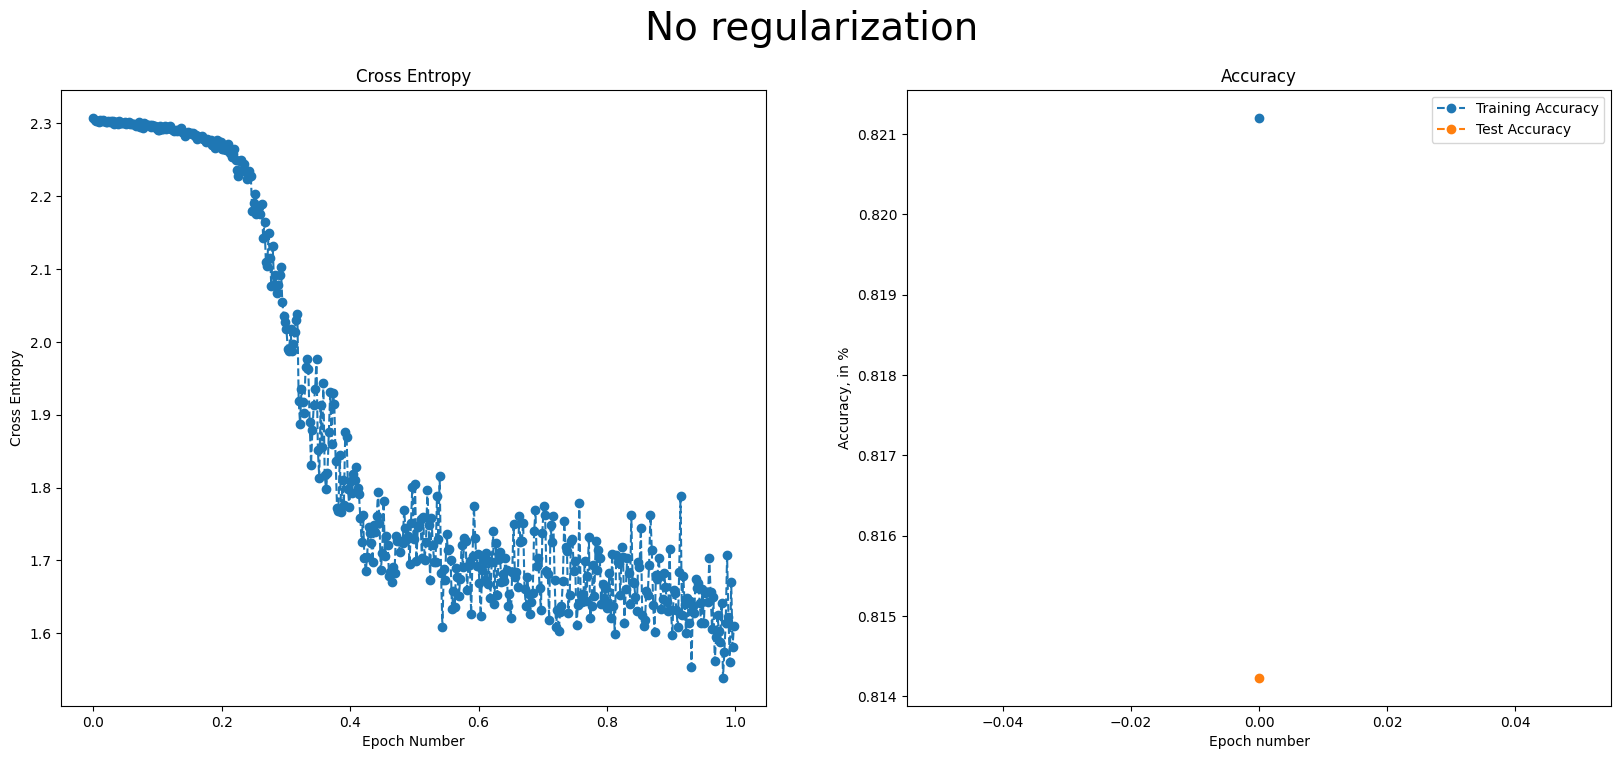

In [6]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="No regularization"
)

#### Plot of Weight Distributions

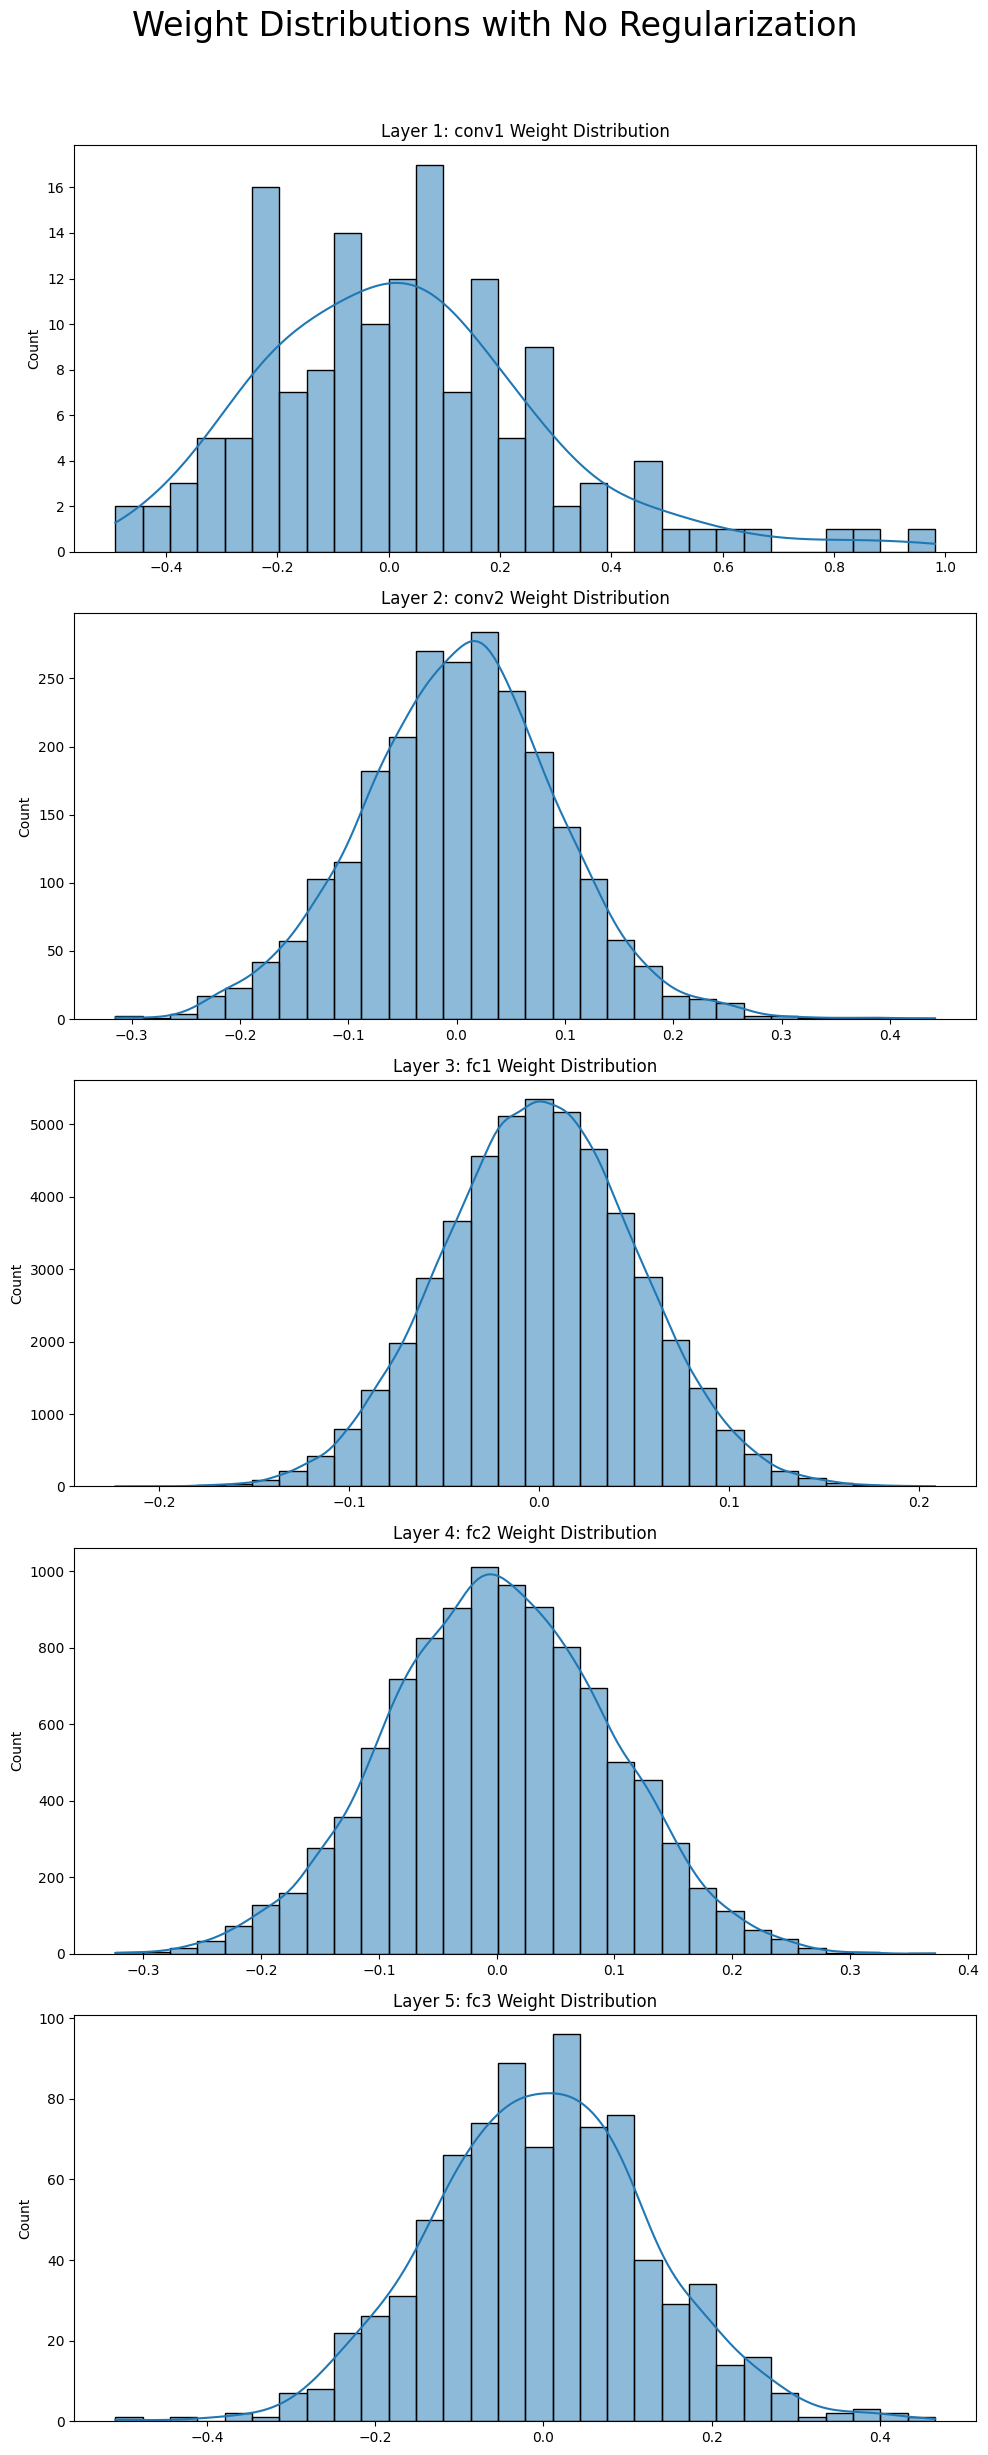

In [7]:
plot_weight_distributions(model, title="Weight Distributions with No Regularization")

#### Plots of Activation Maps

Plots activation maps for each filter in each convolutional layer for a random image taken from the loader sent into the function. To see whether the model builds good representations/picks up on interesting features with the filters - look at train_loader. To see how well it generalizes look at test_loader. We see that images in the first conv layer look almost identical to the input image, while in the second layer they start learning some more clear features.

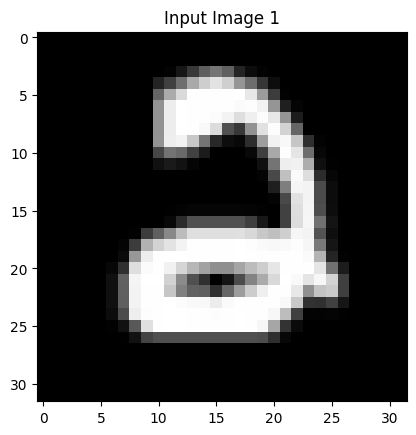

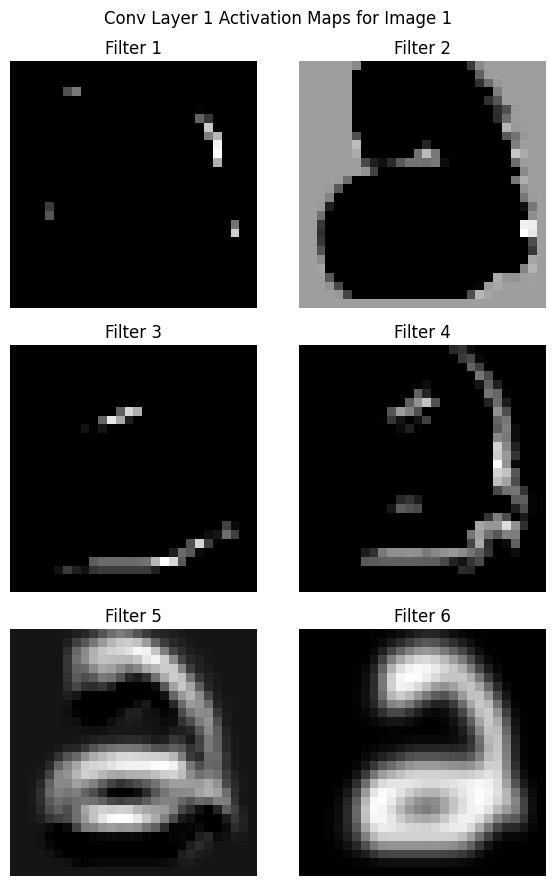

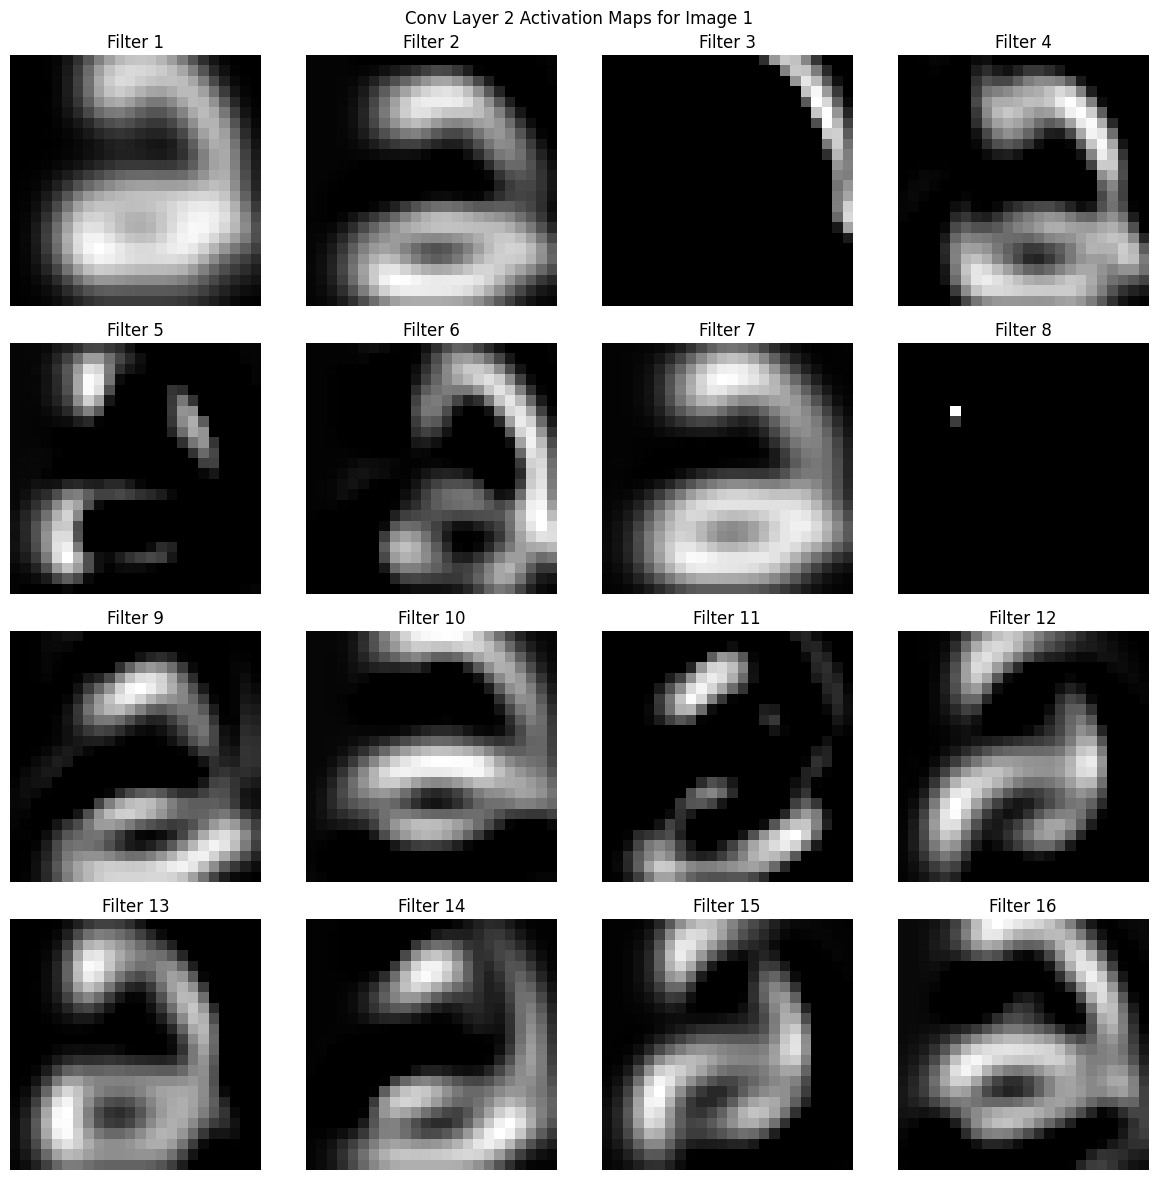

In [8]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

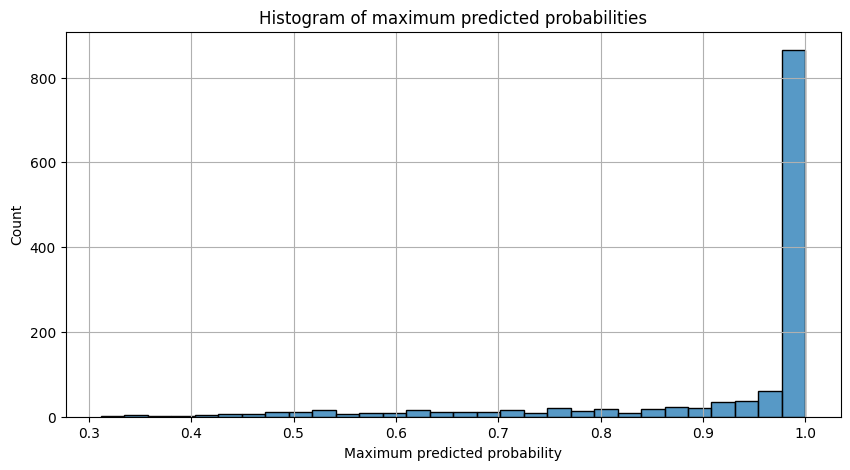

In [22]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

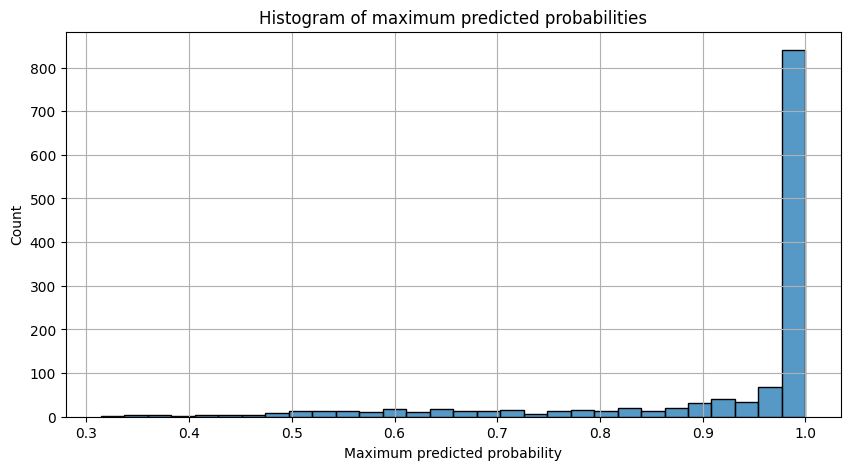

In [23]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## L1 Regularization

### Training

In [10]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l1=True, l1_lmbd=0.001
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:27<01:49, 27.32s/it]

Accuracy of the network on the test images: 82 %
Epoch: 1


 40%|████      | 2/5 [00:56<01:24, 28.18s/it]

Accuracy of the network on the test images: 81 %
Epoch: 2


 60%|██████    | 3/5 [01:23<00:56, 28.00s/it]

Accuracy of the network on the test images: 83 %
Epoch: 3


 80%|████████  | 4/5 [01:50<00:27, 27.48s/it]

Accuracy of the network on the test images: 91 %
Epoch: 4


100%|██████████| 5/5 [02:17<00:00, 27.49s/it]

Accuracy of the network on the test images: 93 %


### Visualization

#### Plot of Losses and Accuracies

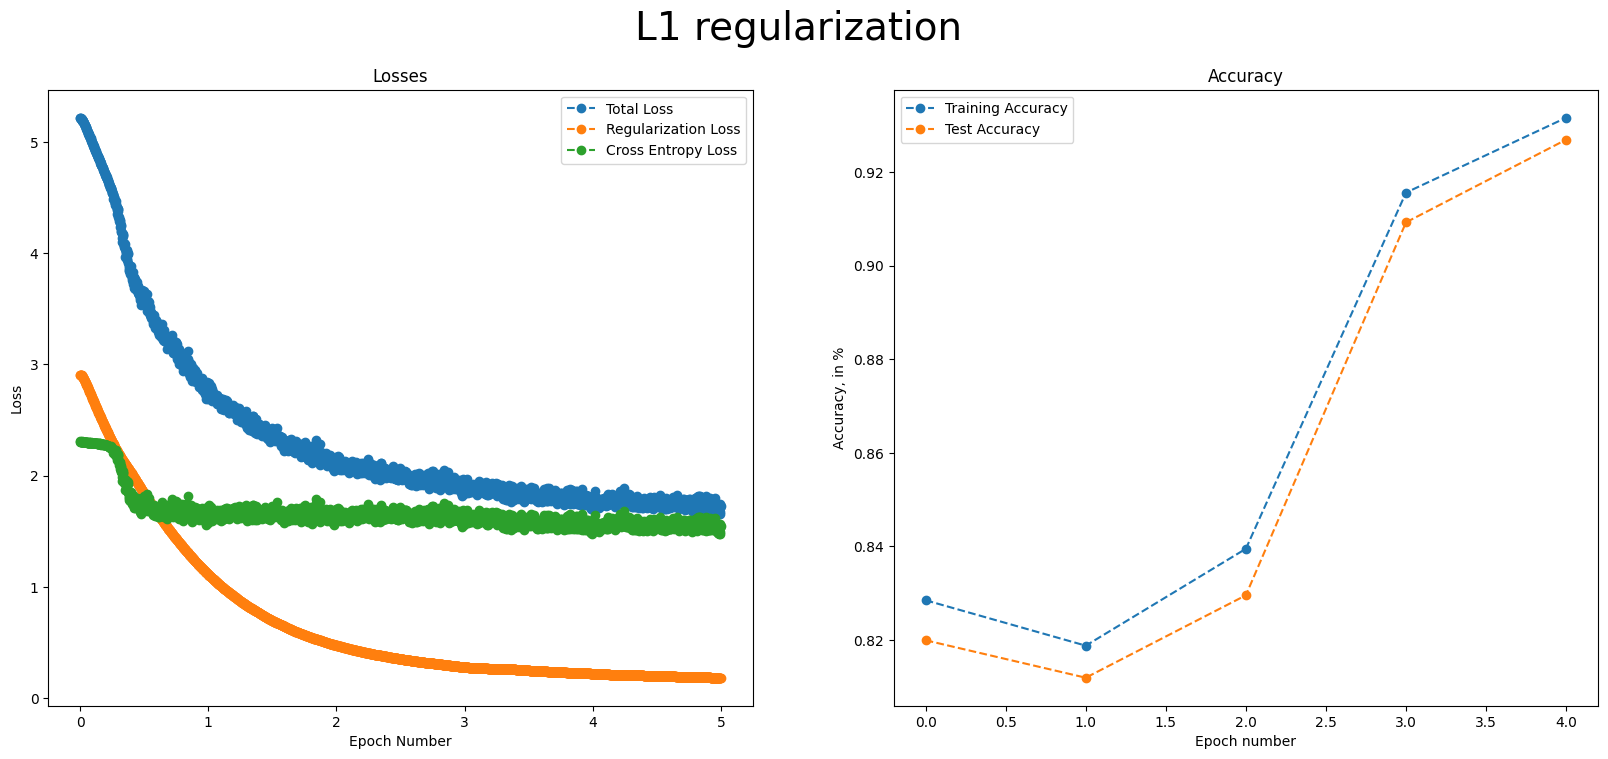

In [11]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L1 regularization",
)

#### Plot of Weight Distributions

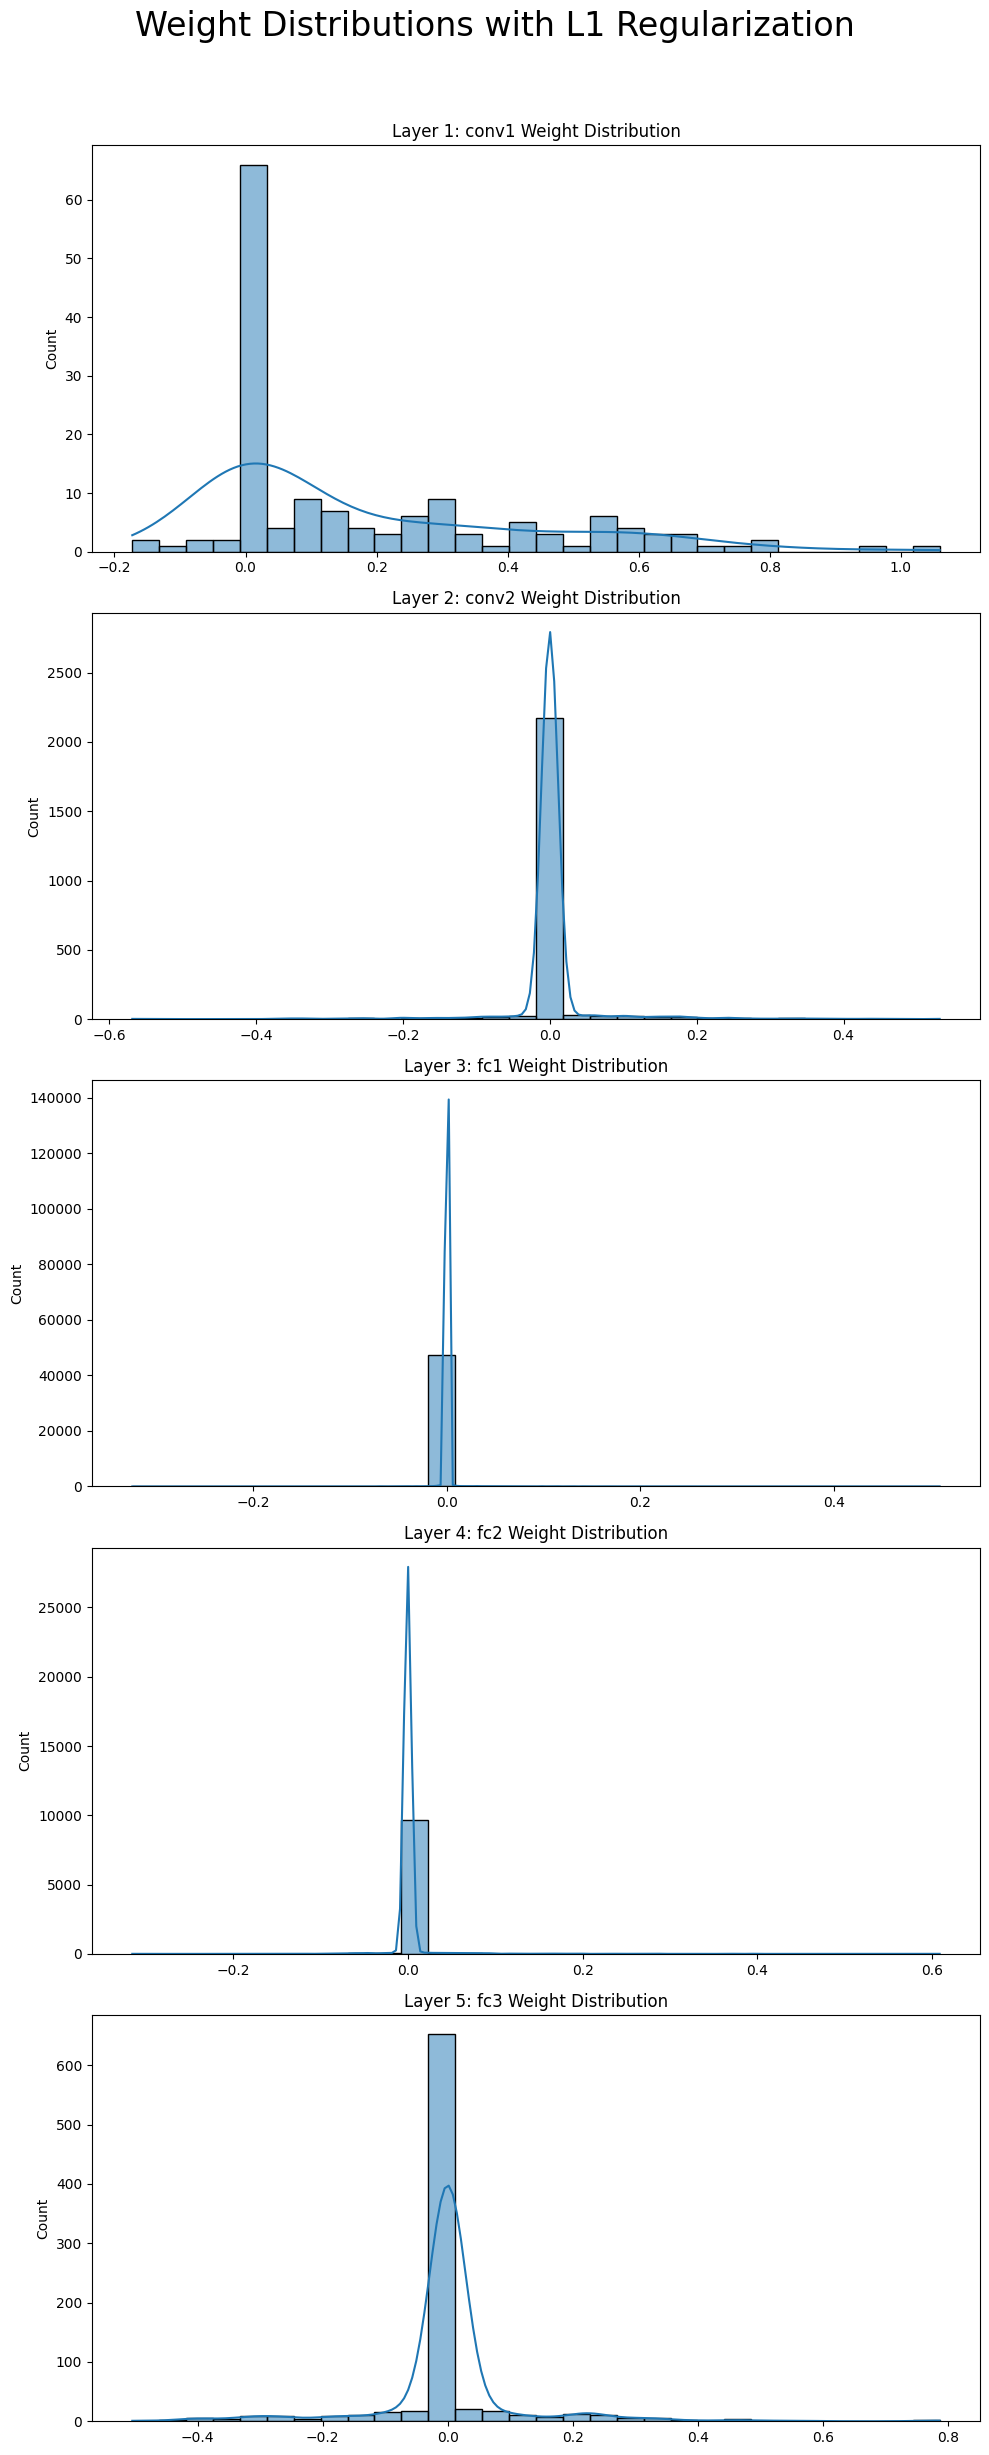

In [12]:
plot_weight_distributions(model, title="Weight Distributions with L1 Regularization")

#### Plots of Activation Maps

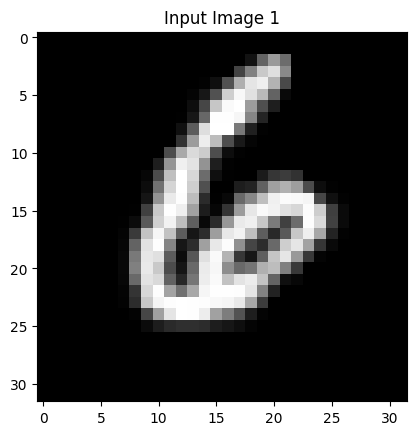

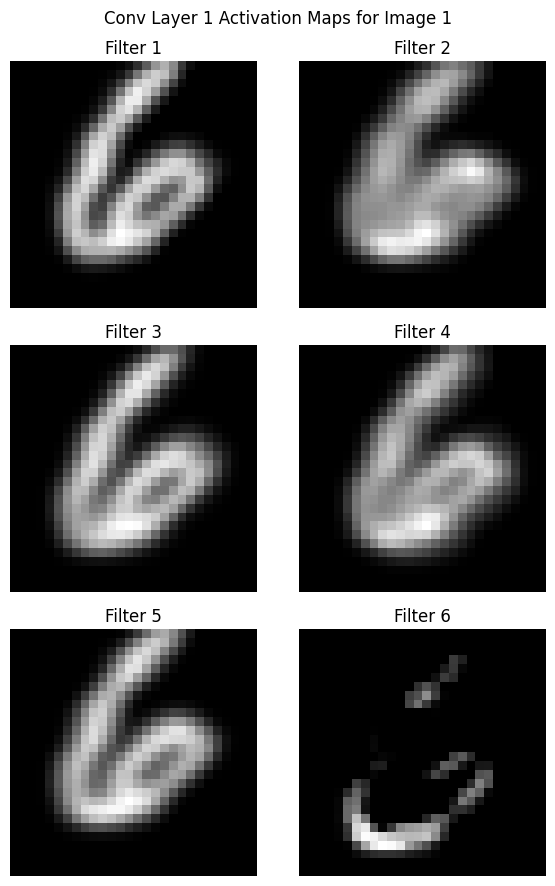

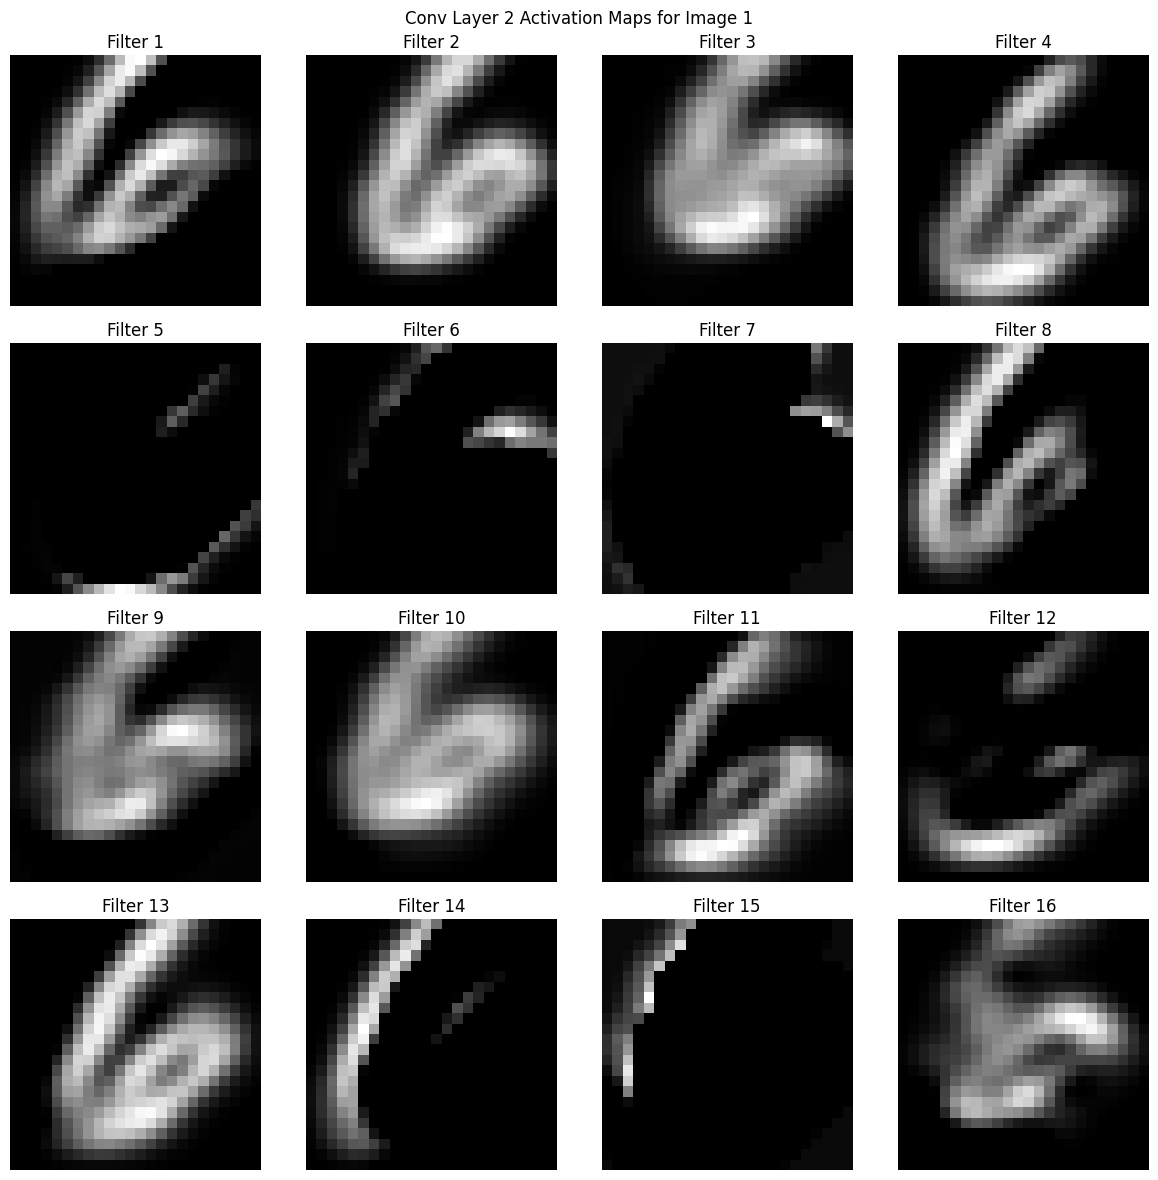

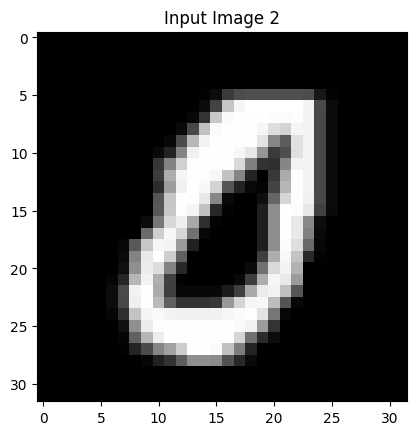

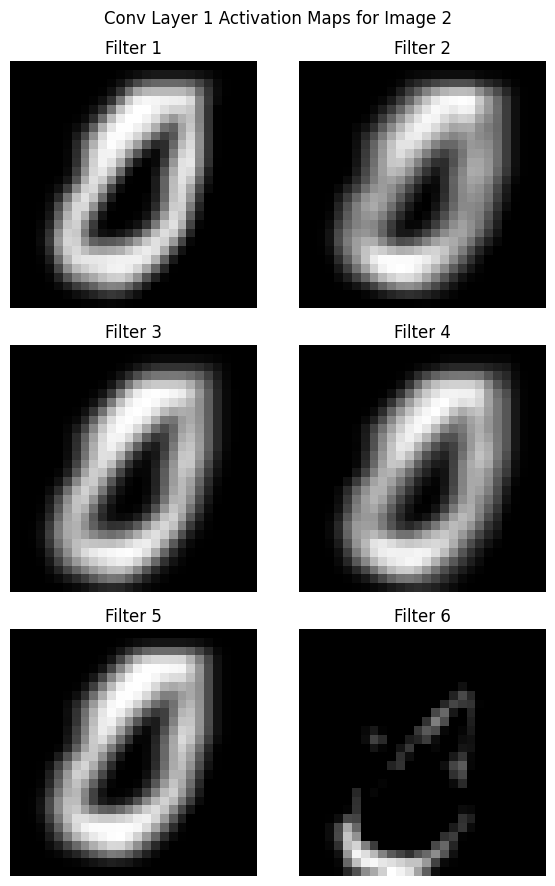

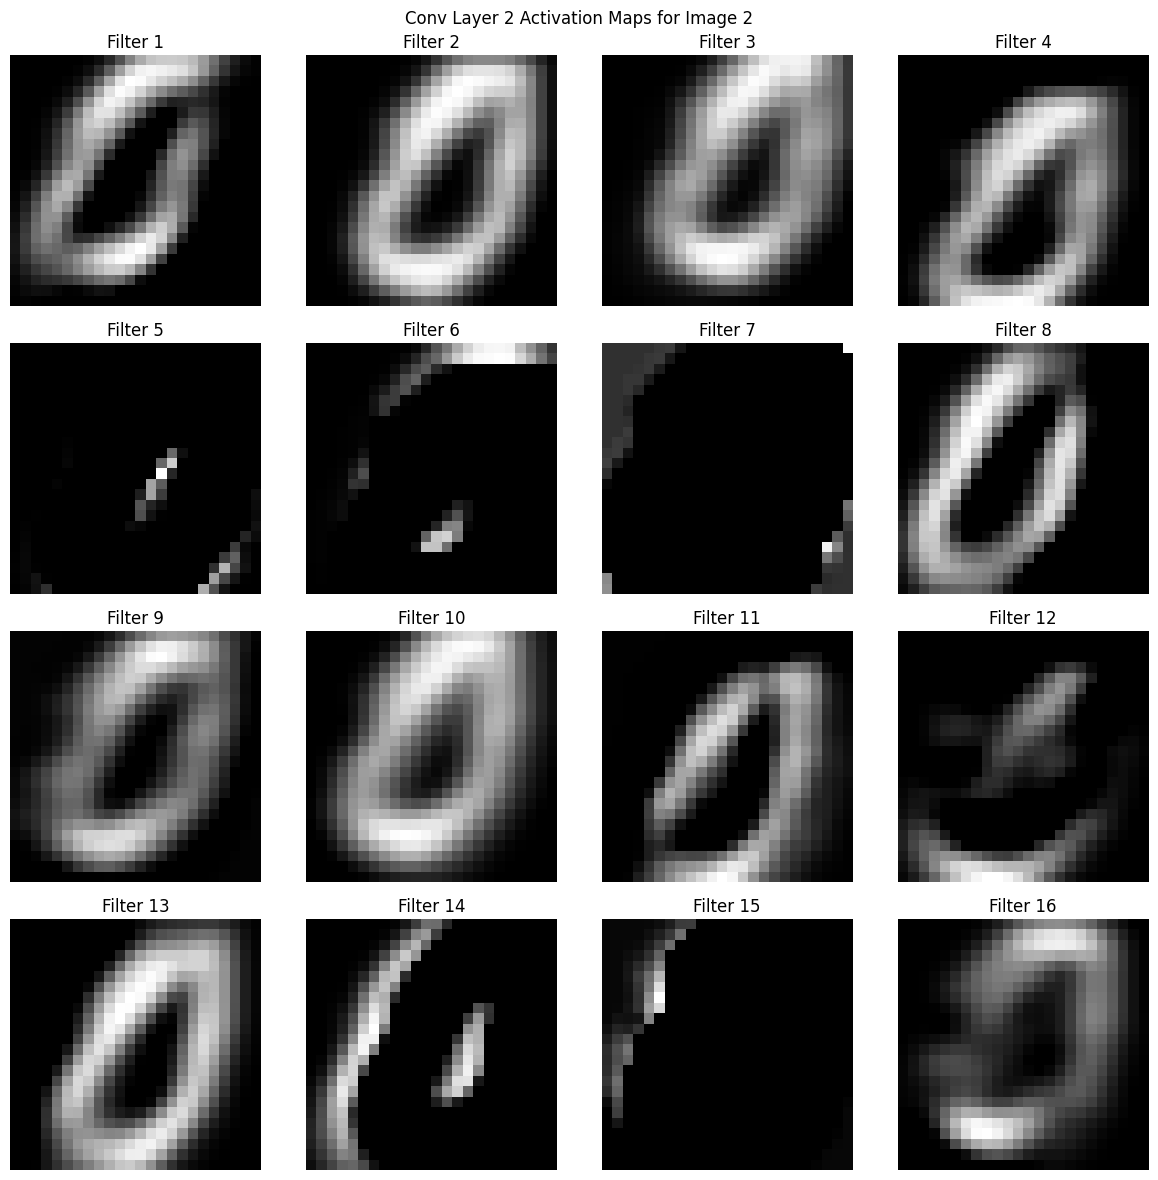

In [13]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## L2 Regularization

### Training

In [16]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l2=True, l2_lmbd=0.01
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:26<01:44, 26.20s/it]

Accuracy of the network on the test images: 79 %
Epoch: 1


 40%|████      | 2/5 [00:54<01:22, 27.47s/it]

Accuracy of the network on the test images: 87 %
Epoch: 2


 60%|██████    | 3/5 [01:21<00:54, 27.09s/it]

Accuracy of the network on the test images: 90 %
Epoch: 3


 80%|████████  | 4/5 [01:47<00:26, 26.69s/it]

Accuracy of the network on the test images: 92 %
Epoch: 4


100%|██████████| 5/5 [02:14<00:00, 26.83s/it]

Accuracy of the network on the test images: 92 %


### Visualization

#### Plot of Losses and Accuracies

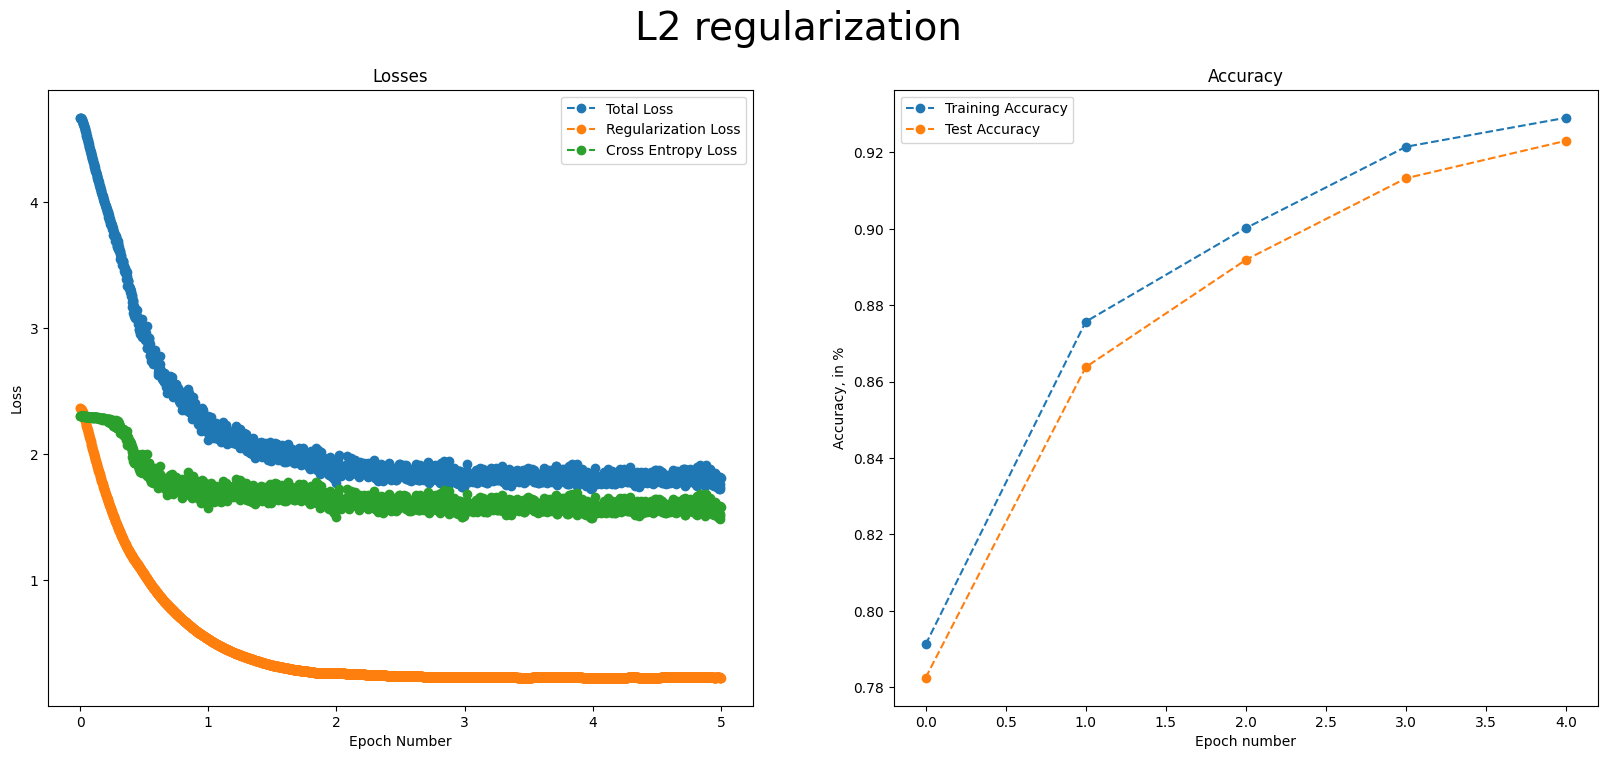

In [17]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L2 regularization",
)

#### Plot of Weight Distributions

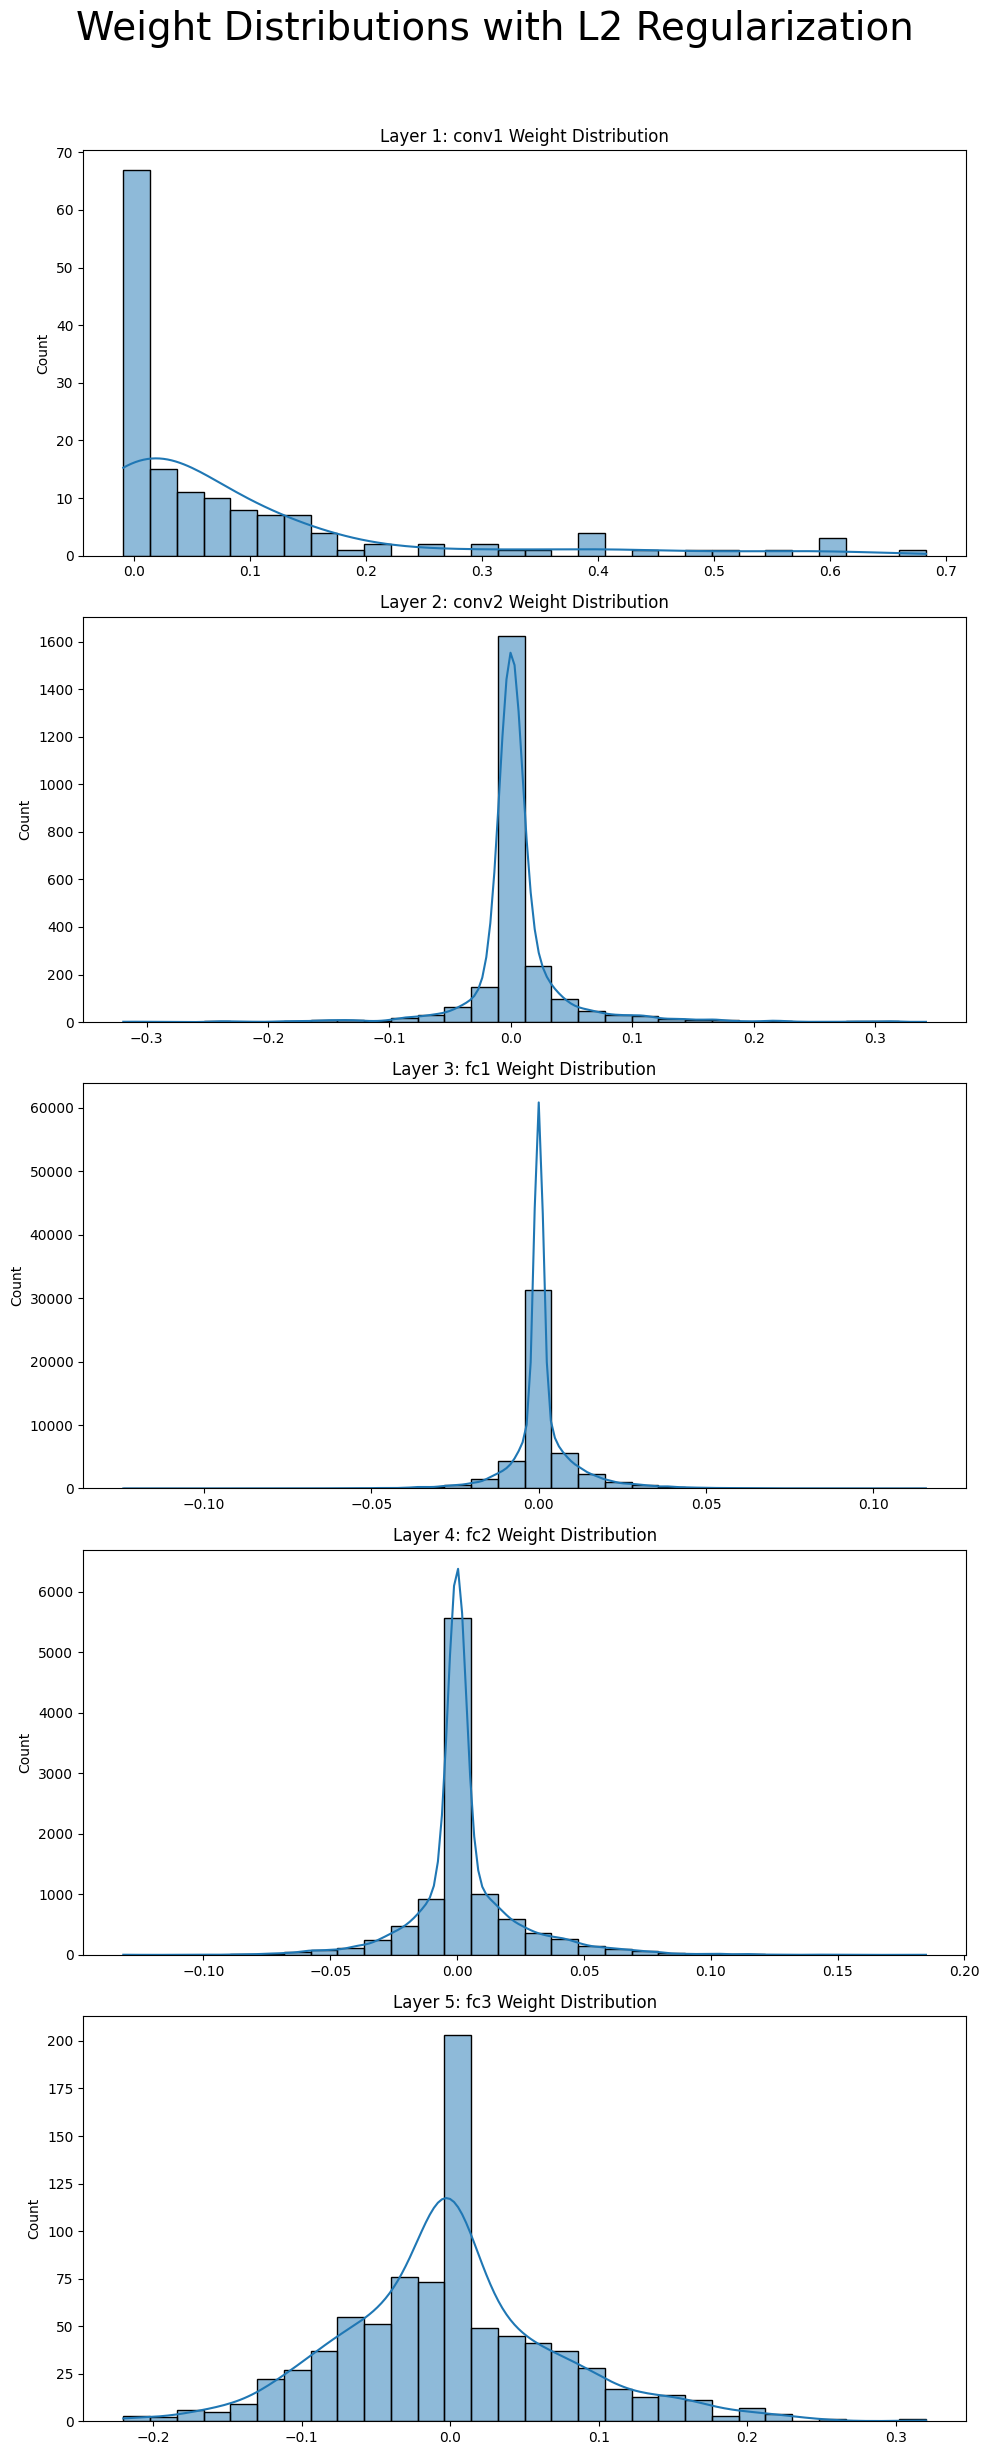

In [18]:
plot_weight_distributions(model, title="Weight Distributions with L2 Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Elastic Net Regularization (L1 and L2)

### Training

In [19]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    l1=True,
    l1_lmbd=0.001,
    l2=True,
    l2_lmbd=0.001,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:26<01:47, 26.85s/it]

Accuracy of the network on the test images: 81 %
Epoch: 1


 40%|████      | 2/5 [00:53<01:20, 26.95s/it]

Accuracy of the network on the test images: 82 %
Epoch: 2


 60%|██████    | 3/5 [01:20<00:53, 26.95s/it]

Accuracy of the network on the test images: 89 %
Epoch: 3


 80%|████████  | 4/5 [01:47<00:26, 26.97s/it]

Accuracy of the network on the test images: 91 %
Epoch: 4


100%|██████████| 5/5 [02:15<00:00, 27.01s/it]

Accuracy of the network on the test images: 92 %


### Visualization

#### Plot of Losses and Accuracies

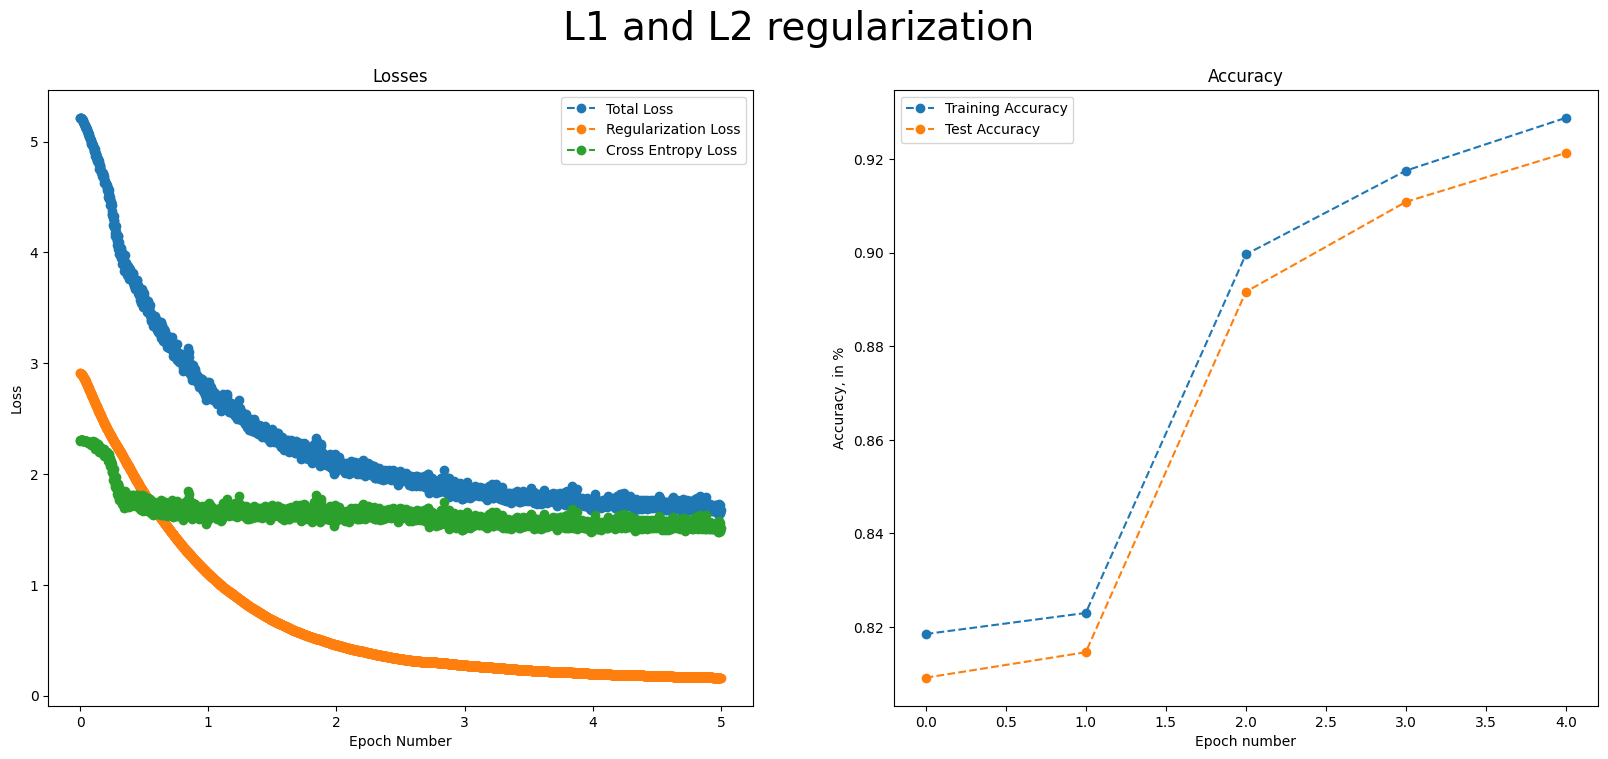

In [20]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L1 and L2 regularization",
)

#### Plot of Weight Distributions

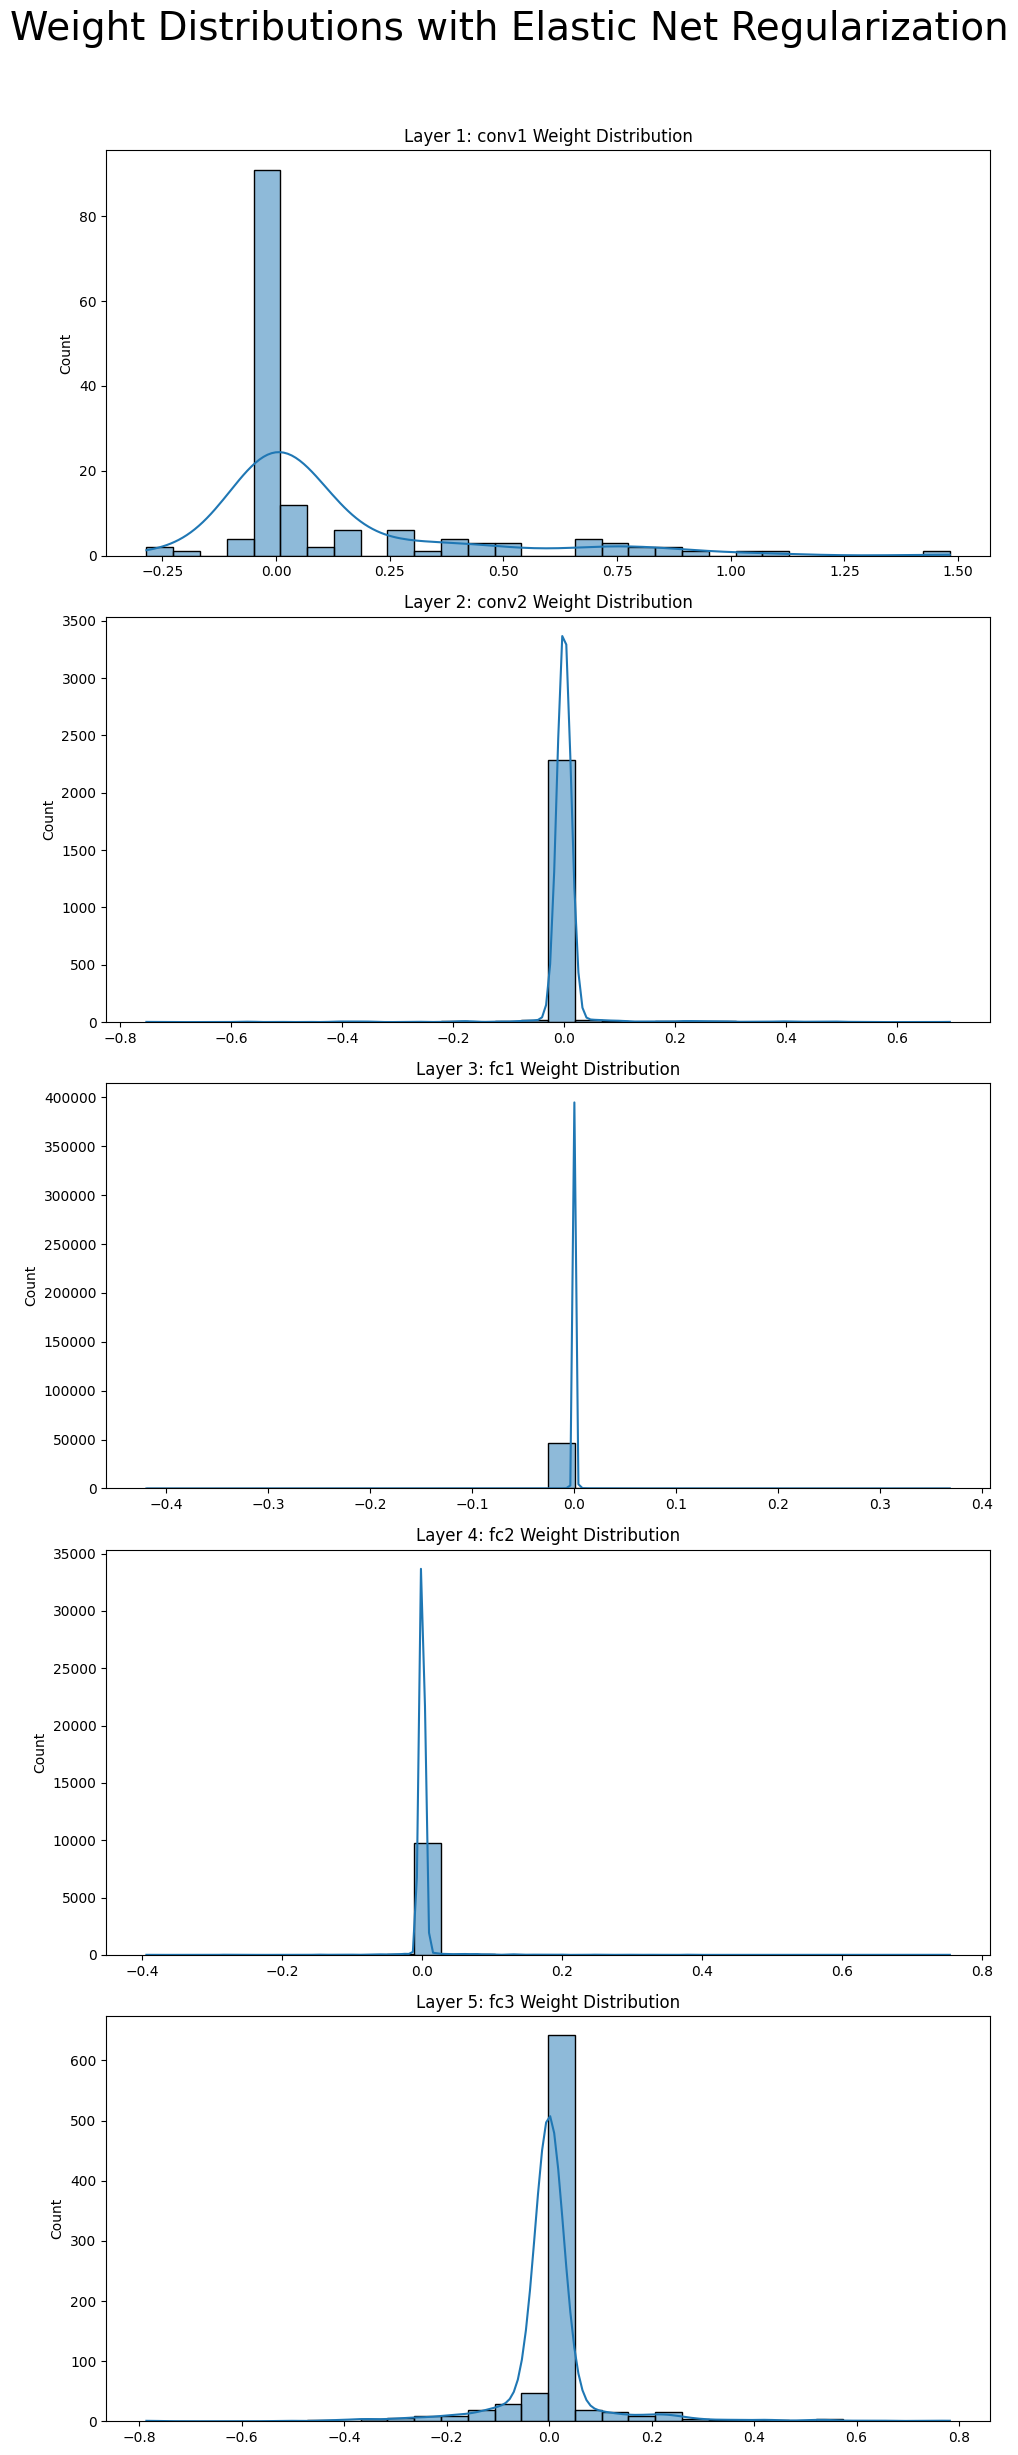

In [21]:
plot_weight_distributions(
    model, title="Weight Distributions with Elastic Net Regularization"
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Soft SVB Regularization

### Training

In [13]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, soft_svb=True, soft_svb_lmbd=0.01
)
print(len(epochs))

Epoch: 0
Accuracy of the network on the test images: 74 %
Epoch: 1
Accuracy of the network on the test images: 76 %
Epoch: 2
Accuracy of the network on the test images: 78 %
Epoch: 3
Accuracy of the network on the test images: 87 %
Epoch: 4
Accuracy of the network on the test images: 88 %
2345


### Visualization

#### Plot of Losses and Accuracies

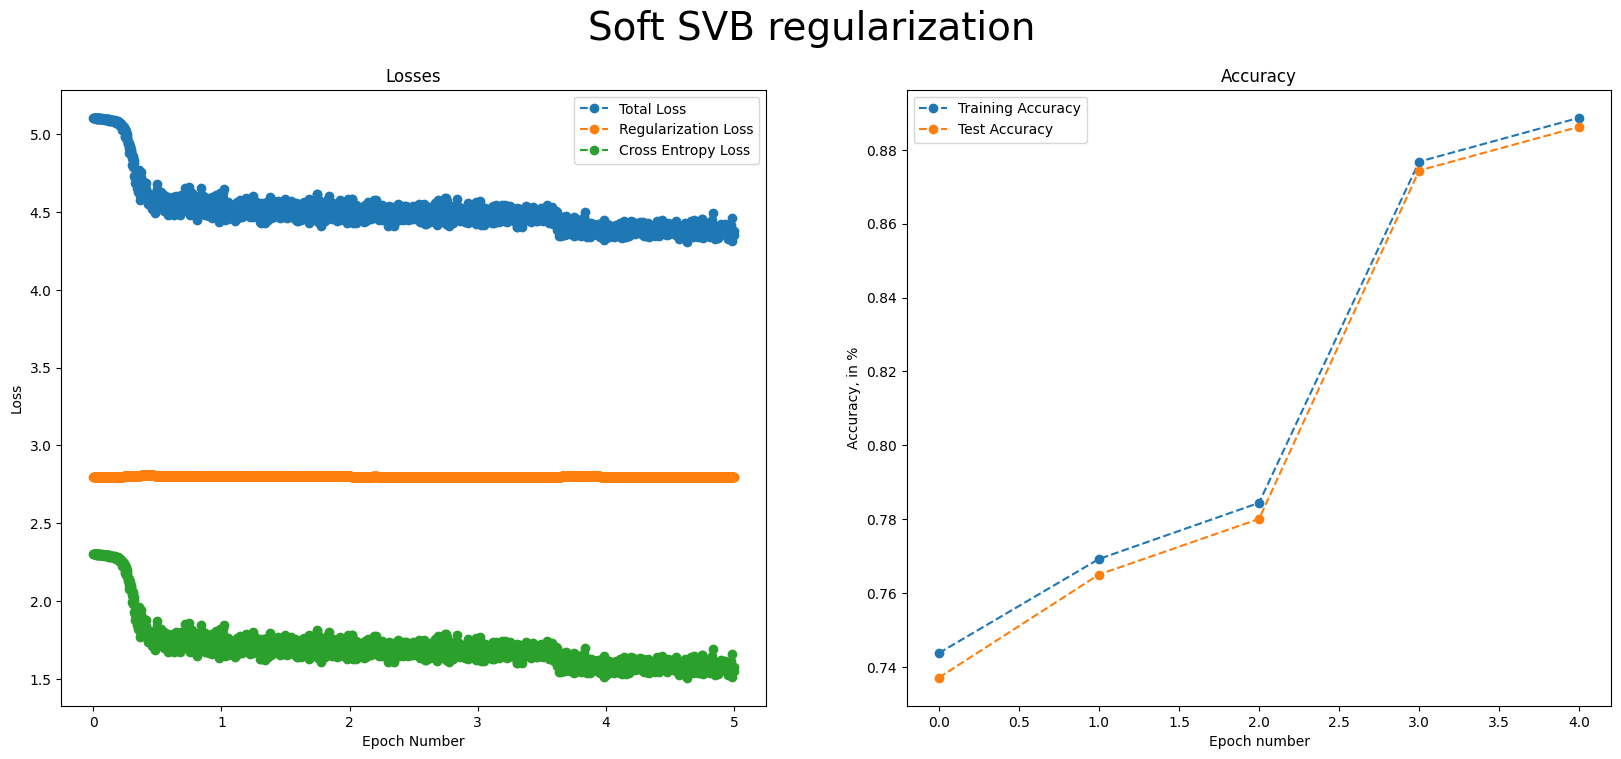

In [14]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Soft SVB regularization",
)

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(model, title = "Weight Distributions with Soft SVB Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Hard SVB Regularization

### Training

In [15]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hard_svb=True, hard_svb_lmbd=0.00001
)

Epoch: 0
Accuracy of the network on the test images: 58 %
Epoch: 1
Accuracy of the network on the test images: 75 %
Epoch: 2
Accuracy of the network on the test images: 77 %
Epoch: 3
Accuracy of the network on the test images: 86 %
Epoch: 4
Accuracy of the network on the test images: 97 %


### Visualization

#### Plot of Losses and Accuracies

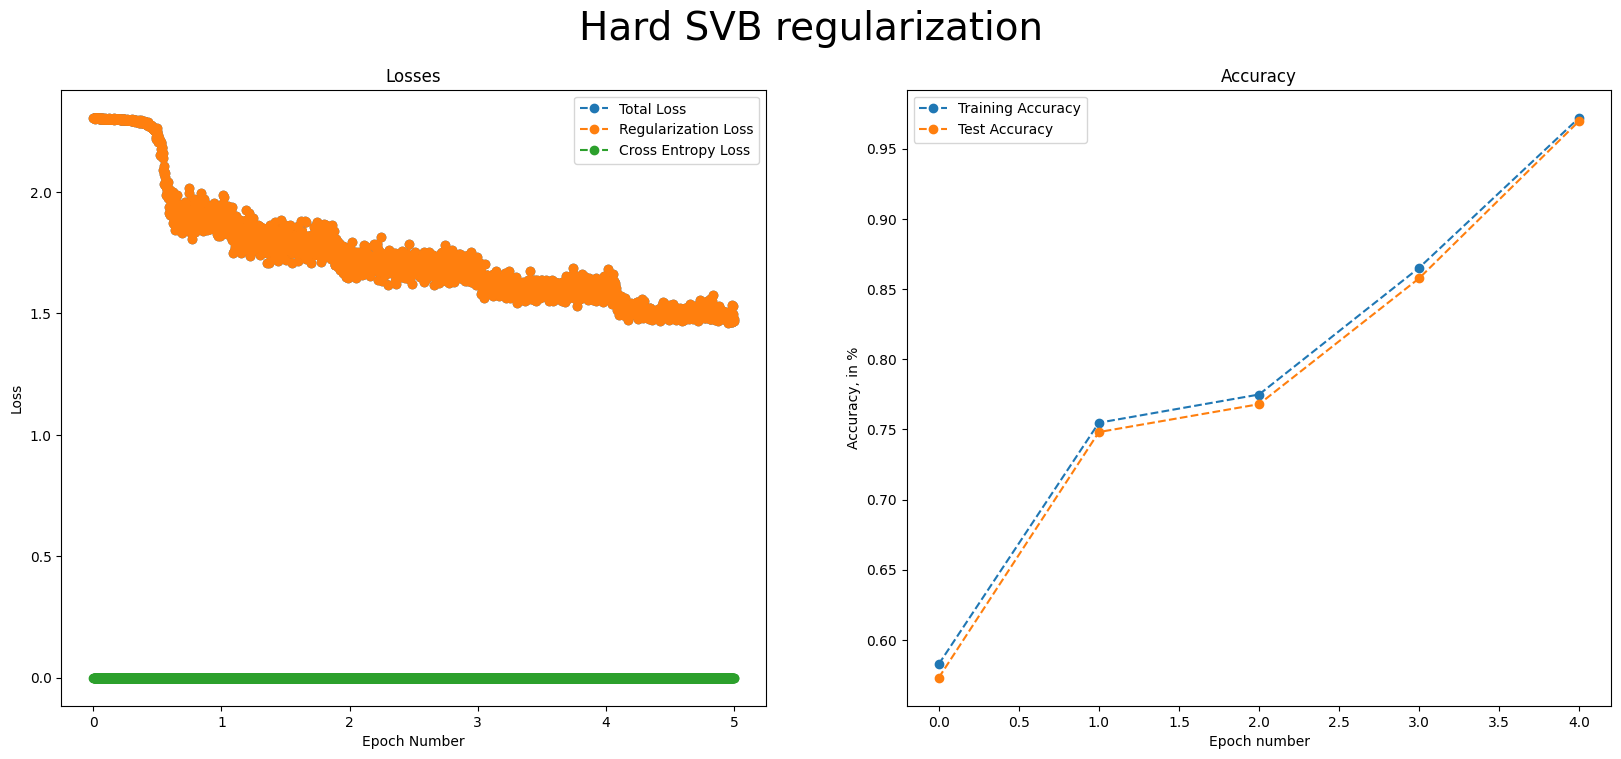

In [16]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Hard SVB regularization",
)

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(model, title = "Weight Distributions with Hard SVB Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Jacobi Regularization

### Training

In [17]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, jacobi_reg=True, jacobi_reg_lmbd=1
)

calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 83 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 94 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 96 %


### Visualization

#### Plot of Losses and Accuracies

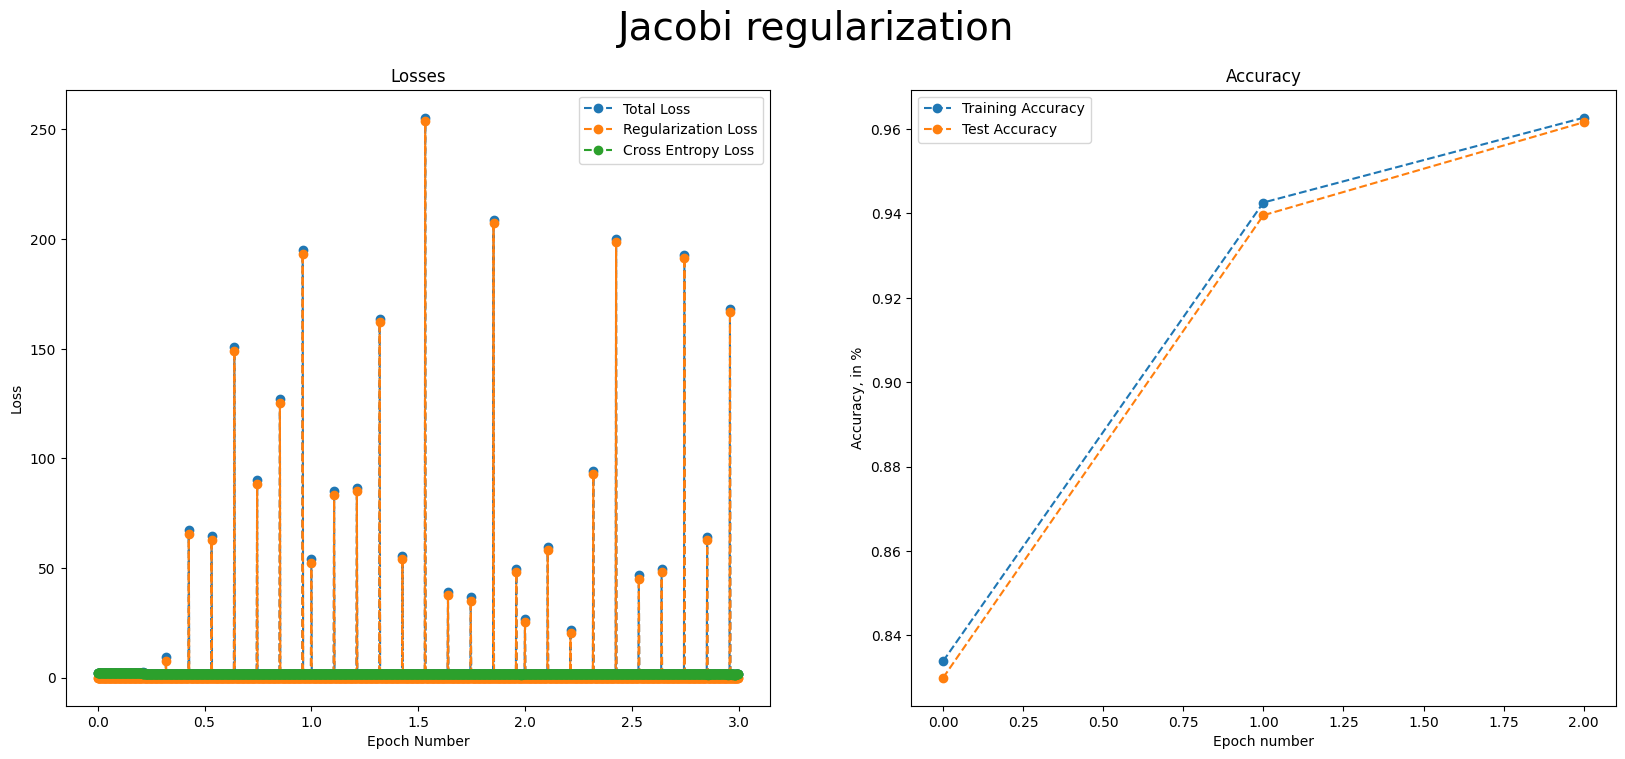

In [18]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Jacobi regularization",
)

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(model, title="Weight Distributions with Jacobi Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Jacobi Determinant Regularization

### Training

In [19]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    jacobi_det_reg=True,
    jacobi_det_reg_lmbd=0.001,
)

calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 81 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 94 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 96 %


### Visualization

#### Plot of Losses and Accuracies

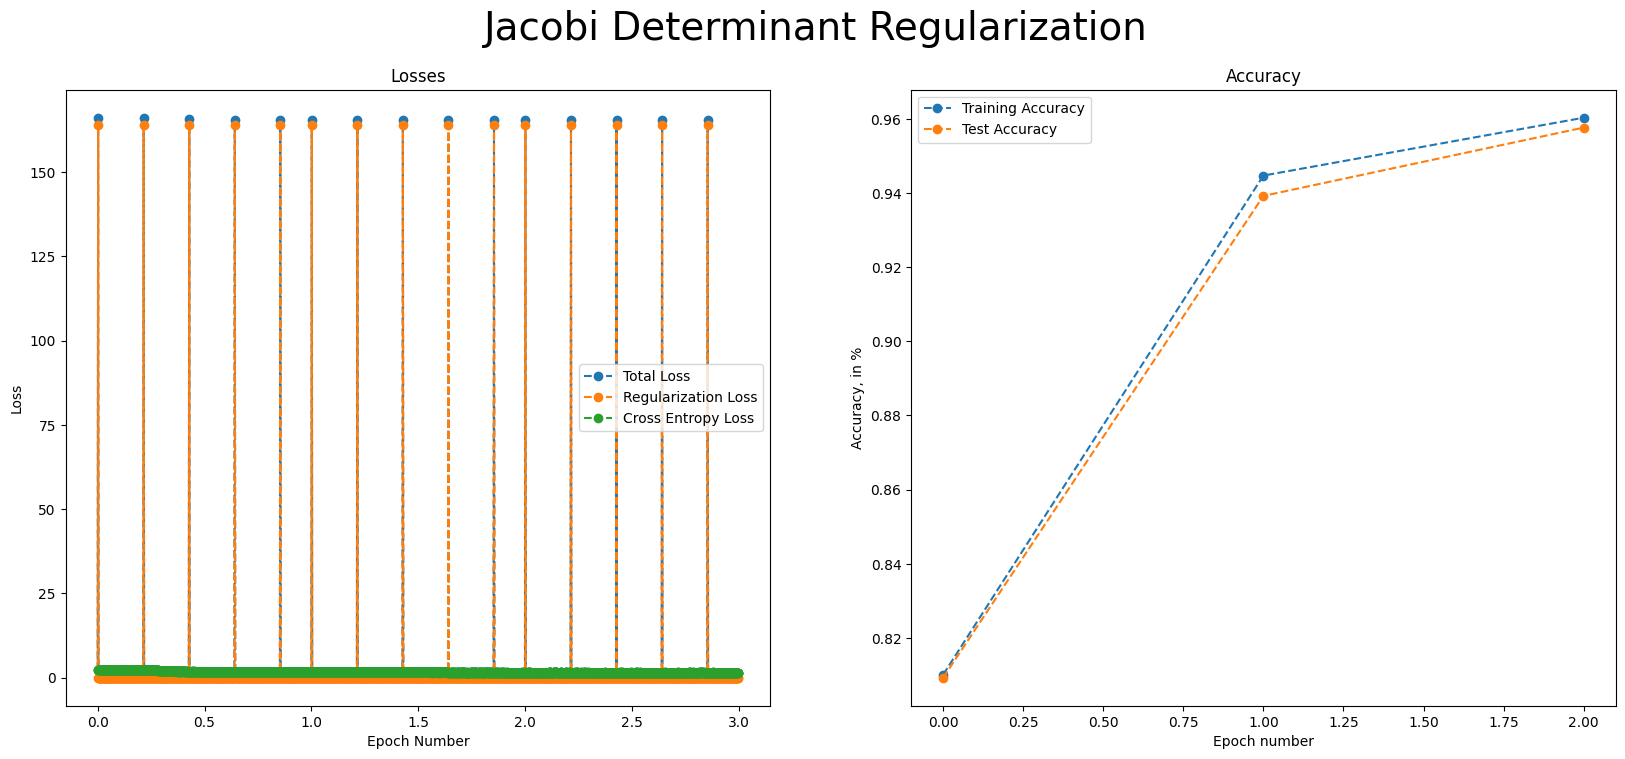

In [20]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Jacobi Determinant Regularization",
)

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(model, title="Weight Distributions with Jacobi Determinant Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Dropout Regularization

### Training

In [14]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, dropout_rate=0.2).to(
    device
)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:27<01:50, 27.64s/it]

Accuracy of the network on the test images: 73 %
Epoch: 1


 40%|████      | 2/5 [00:54<01:22, 27.35s/it]

Accuracy of the network on the test images: 90 %
Epoch: 2


 60%|██████    | 3/5 [01:21<00:53, 26.86s/it]

Accuracy of the network on the test images: 93 %
Epoch: 3


 80%|████████  | 4/5 [01:47<00:26, 26.62s/it]

Accuracy of the network on the test images: 95 %
Epoch: 4


100%|██████████| 5/5 [02:15<00:00, 27.19s/it]

Accuracy of the network on the test images: 96 %


### Visualization

#### Plot of Losses and Accuracies

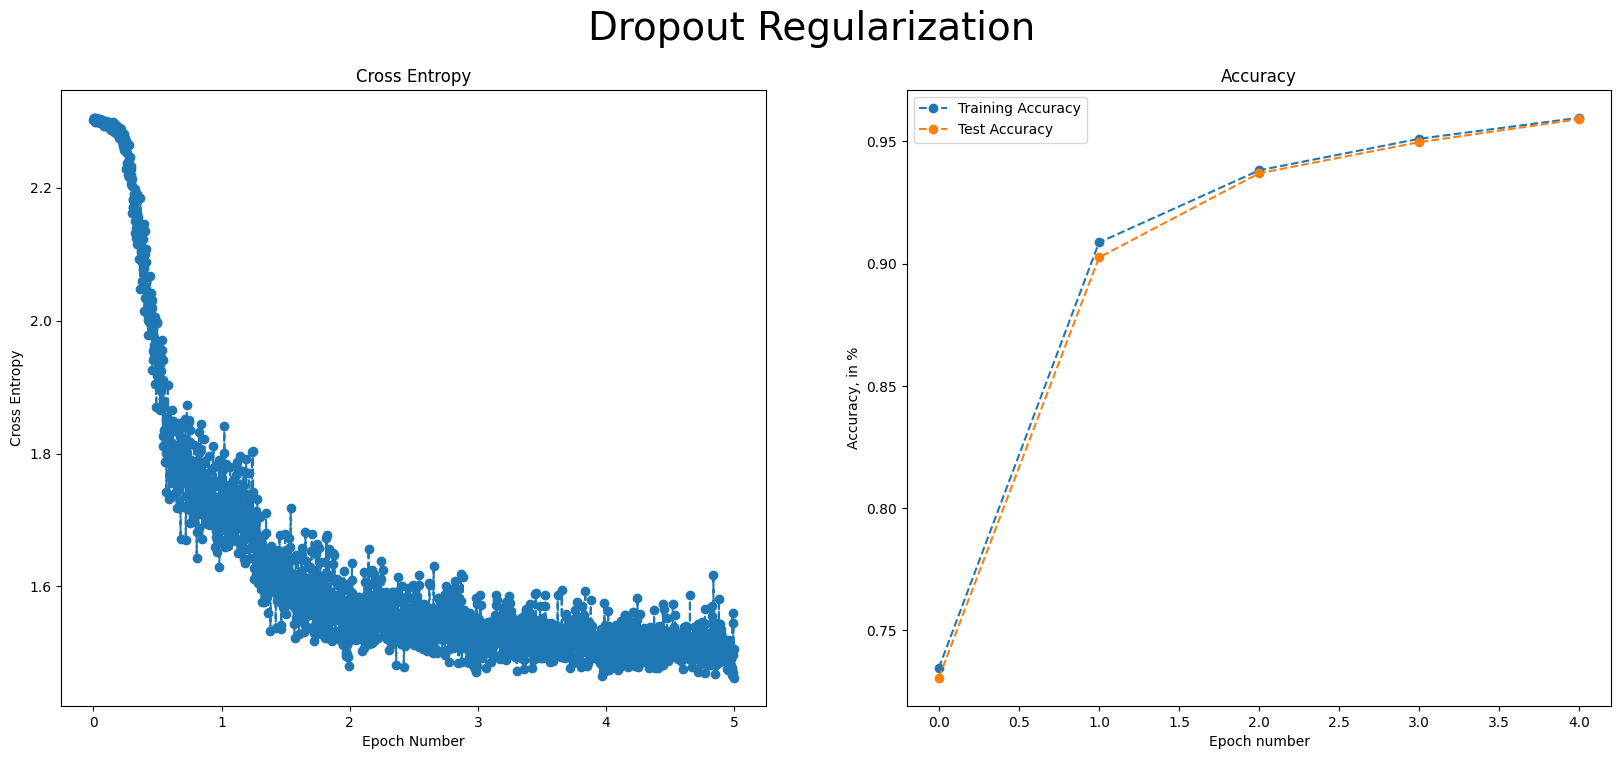

In [15]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="Dropout Regularization"
)

#### Plot of Weight Distributions

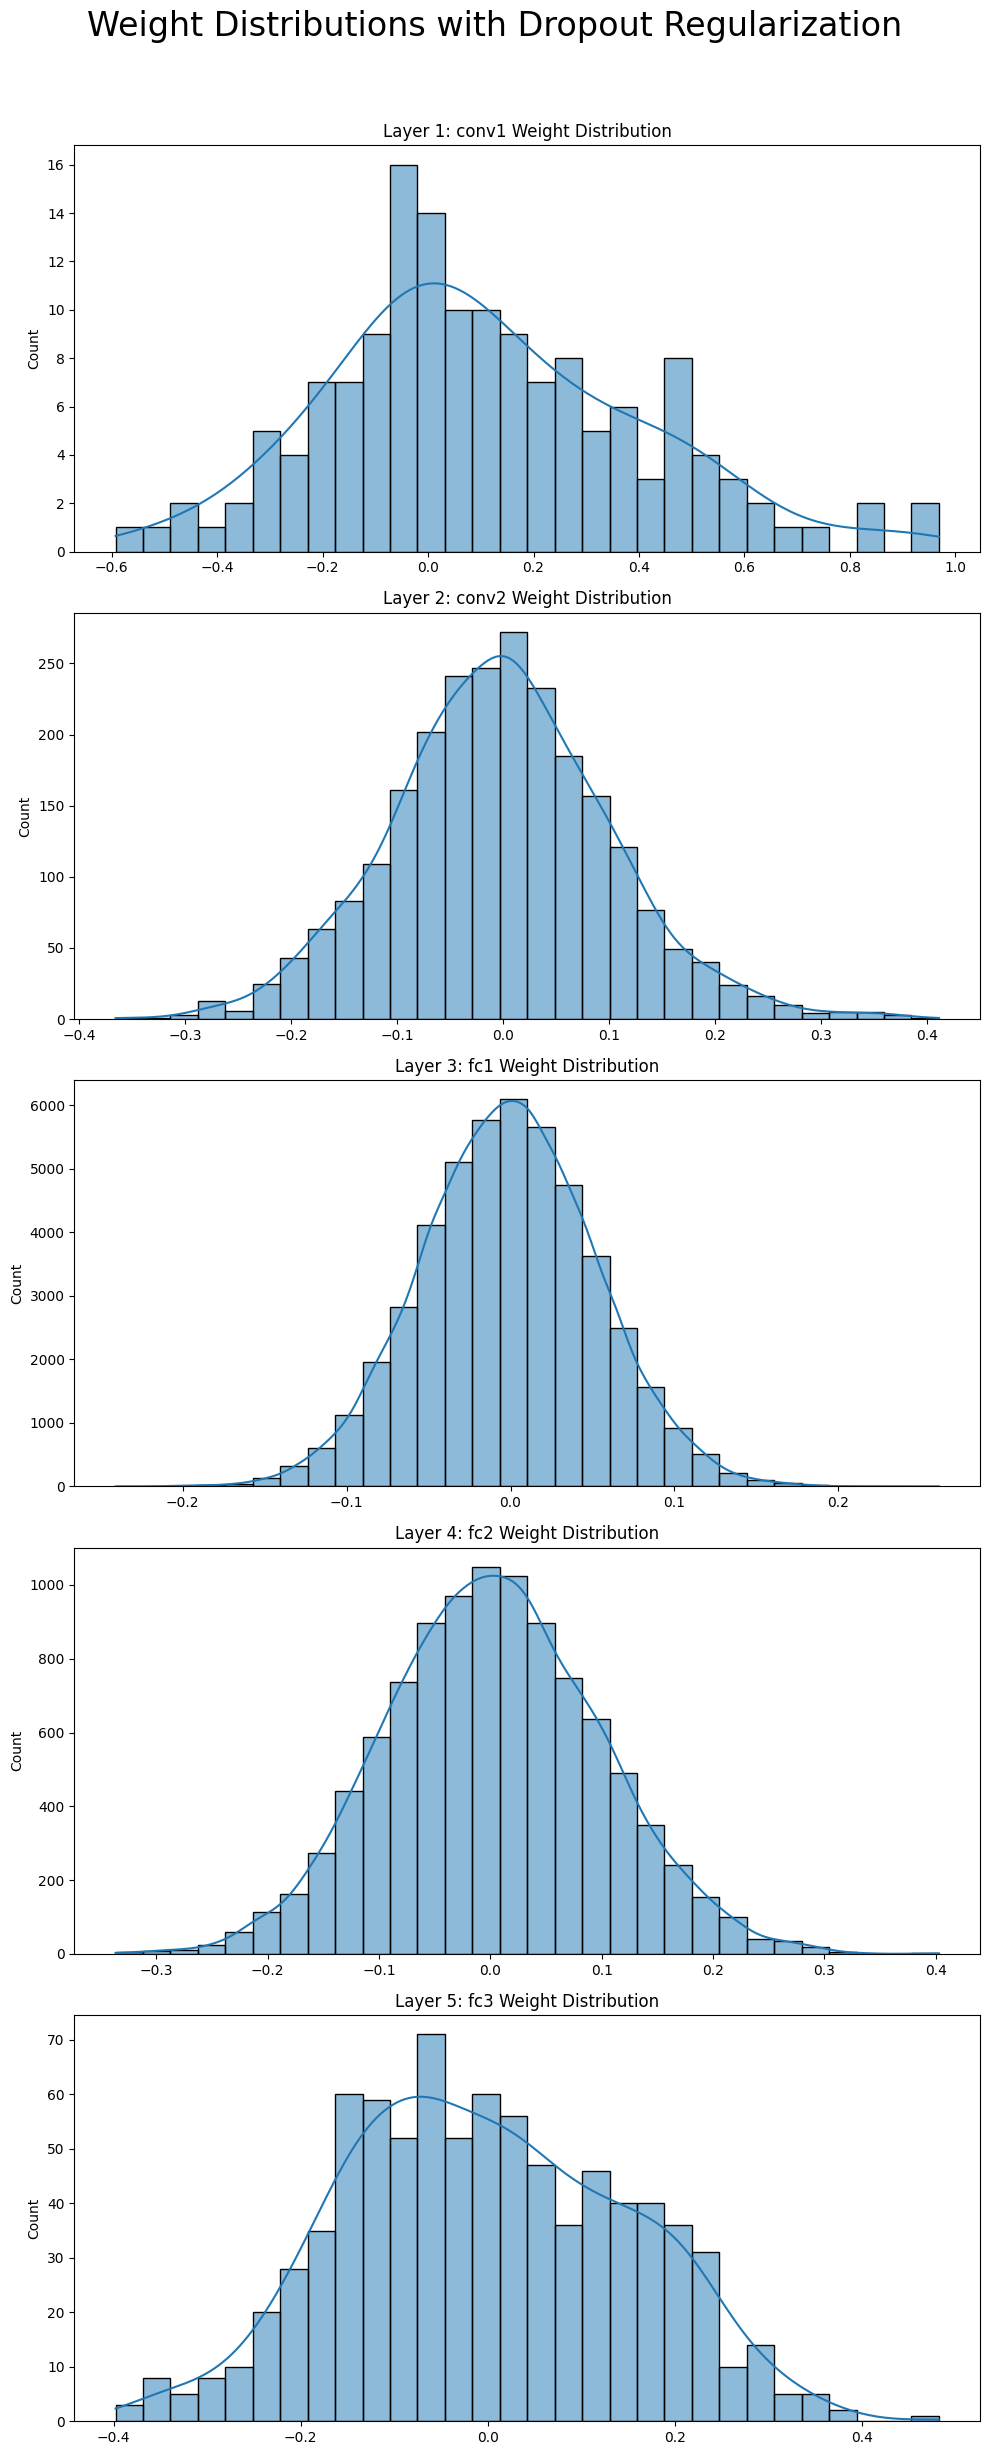

In [16]:
plot_weight_distributions(
    model, title="Weight Distributions with Dropout Regularization"
)

#### Plots of Activation Maps

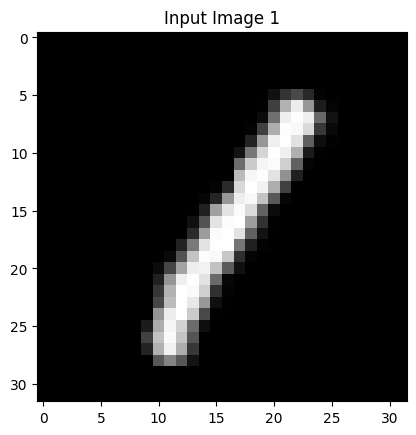

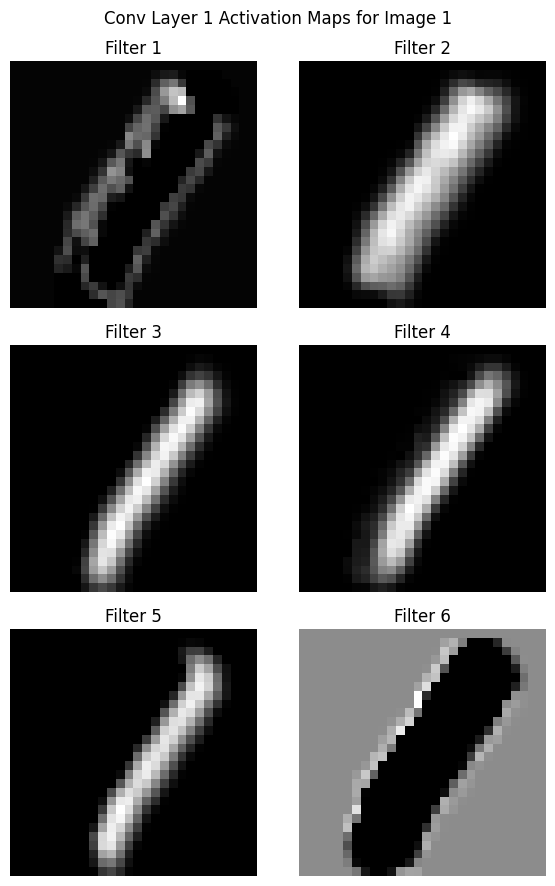

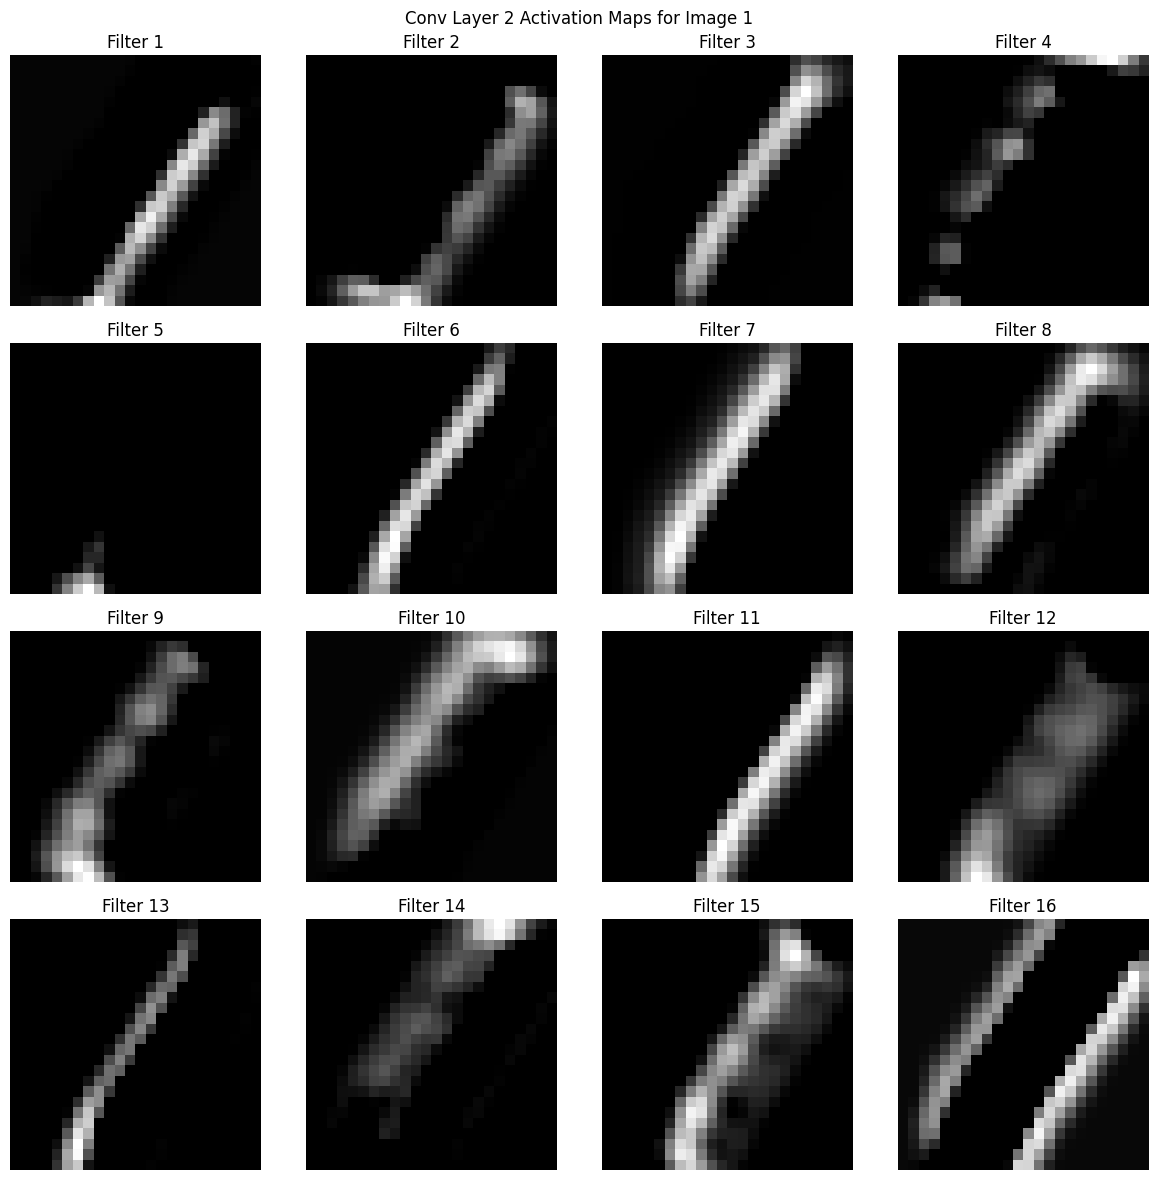

In [17]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Confidence Penalty Regularization

### Training

In [24]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    conf_penalty=True,
    conf_penalty_lmbd=0.03,
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


 33%|███▎      | 1/3 [00:27<00:54, 27.18s/it]

Accuracy of the network on the test images: 49 %
Epoch: 1


 67%|██████▋   | 2/3 [00:54<00:27, 27.50s/it]

Accuracy of the network on the test images: 63 %
Epoch: 2


100%|██████████| 3/3 [01:24<00:00, 28.24s/it]

Accuracy of the network on the test images: 68 %


### Visualization

#### Plot of Losses and Accuracies

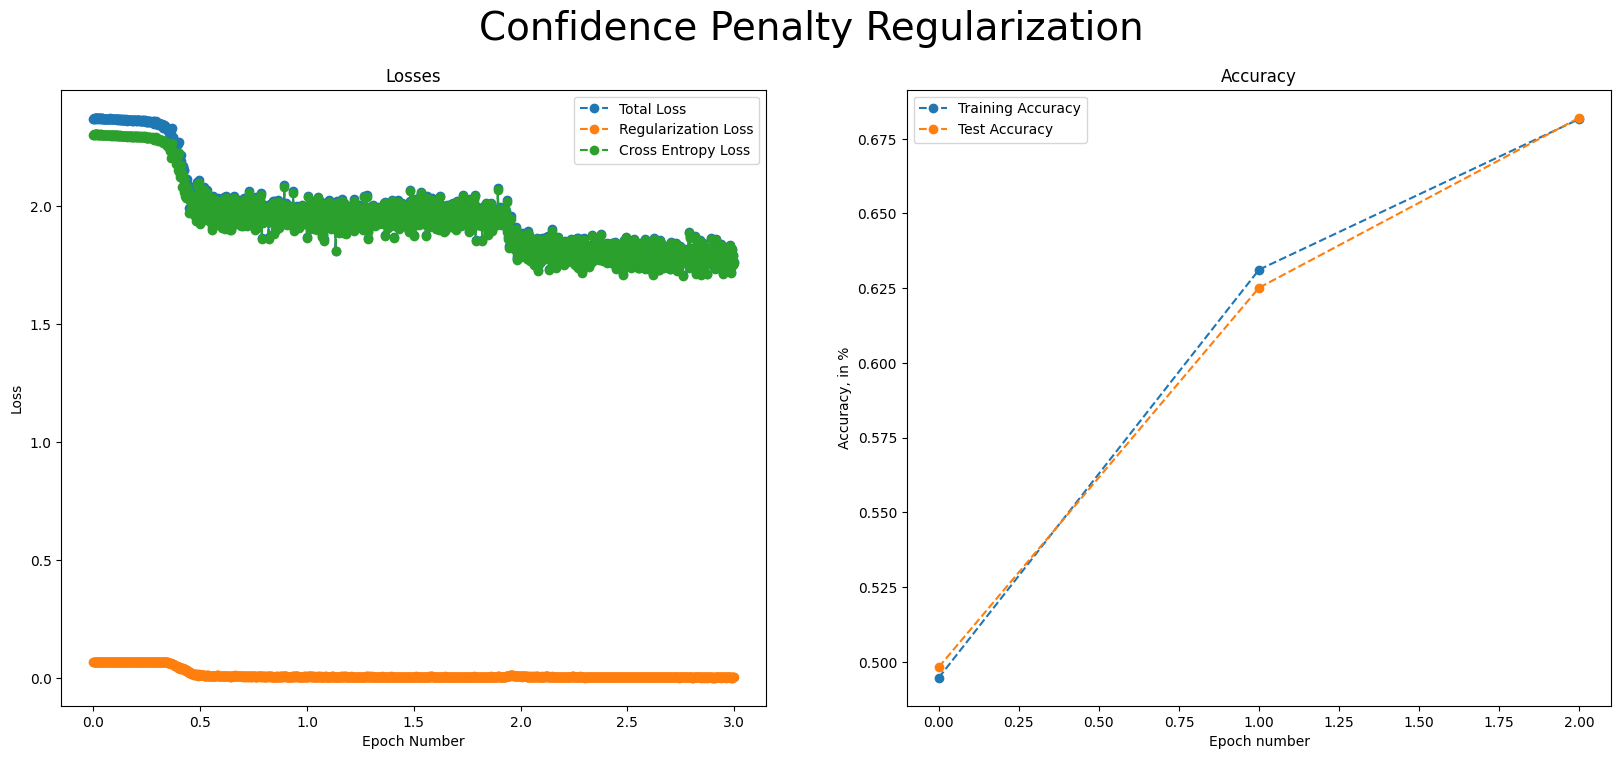

In [25]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Confidence Penalty Regularization",
)

#### Plot of Weight Distributions

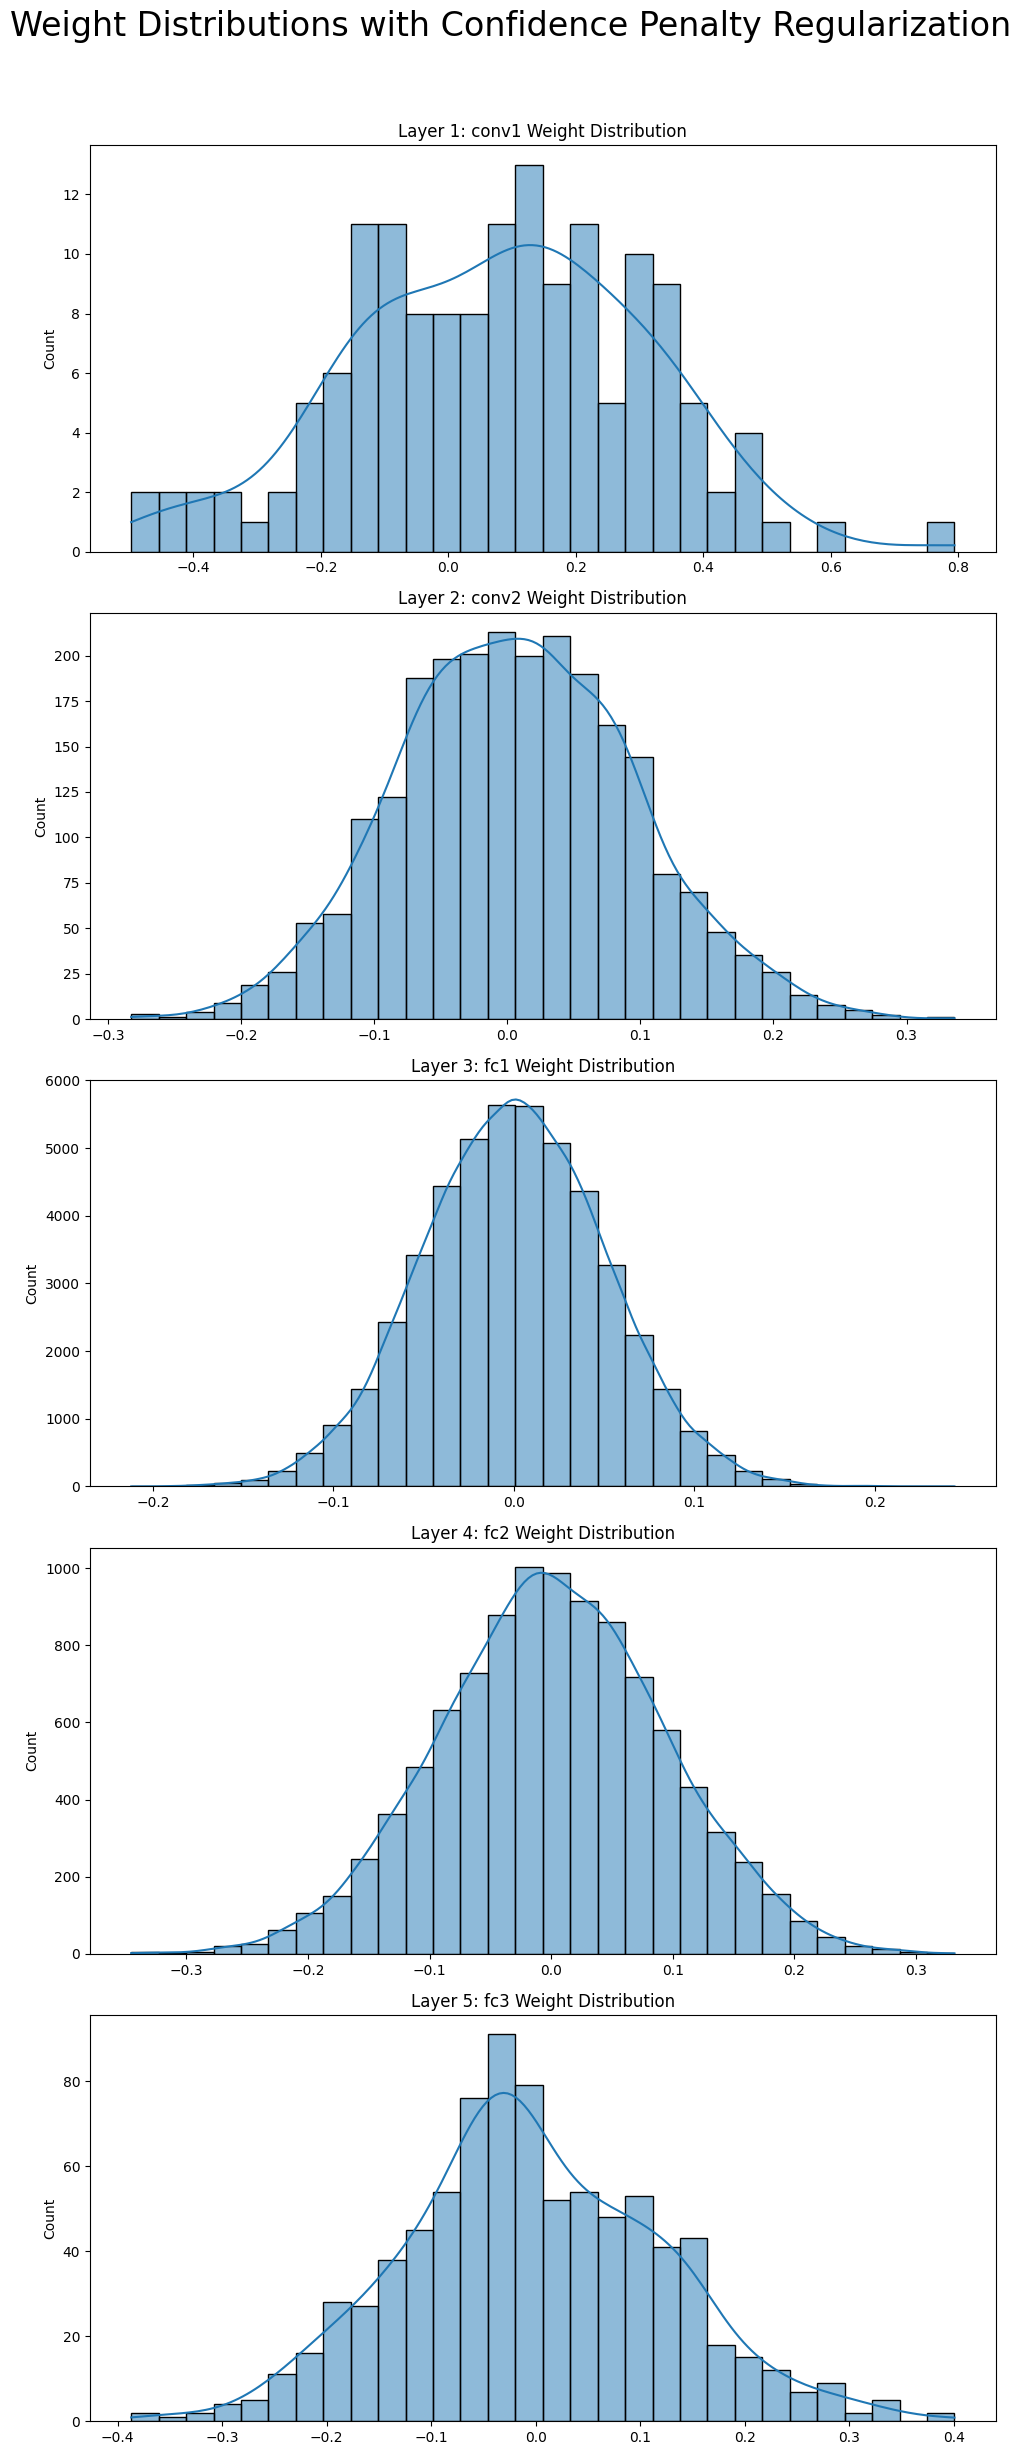

In [12]:
plot_weight_distributions(
    model, title="Weight Distributions with Confidence Penalty Regularization"
)

#### Plots of Activation Maps

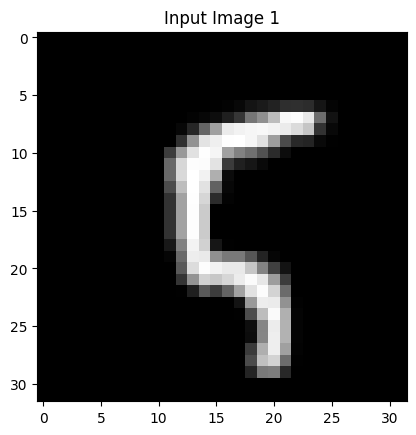

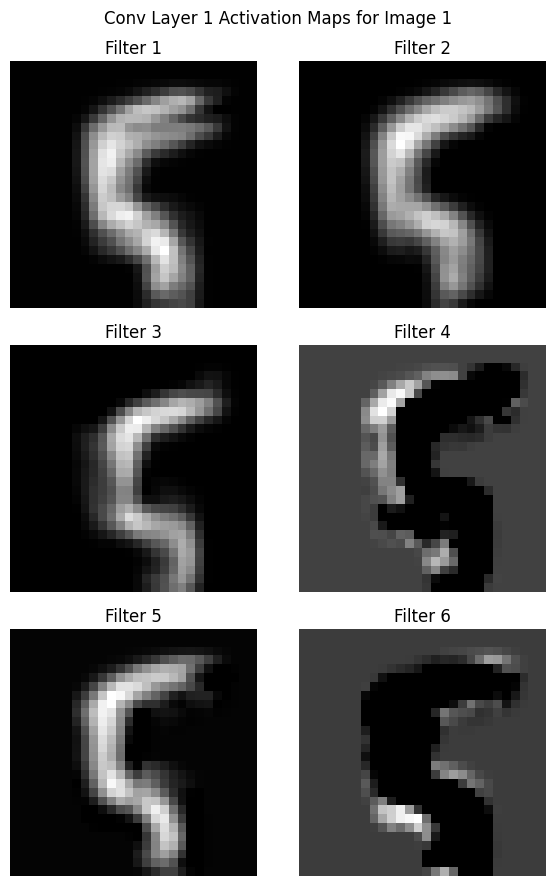

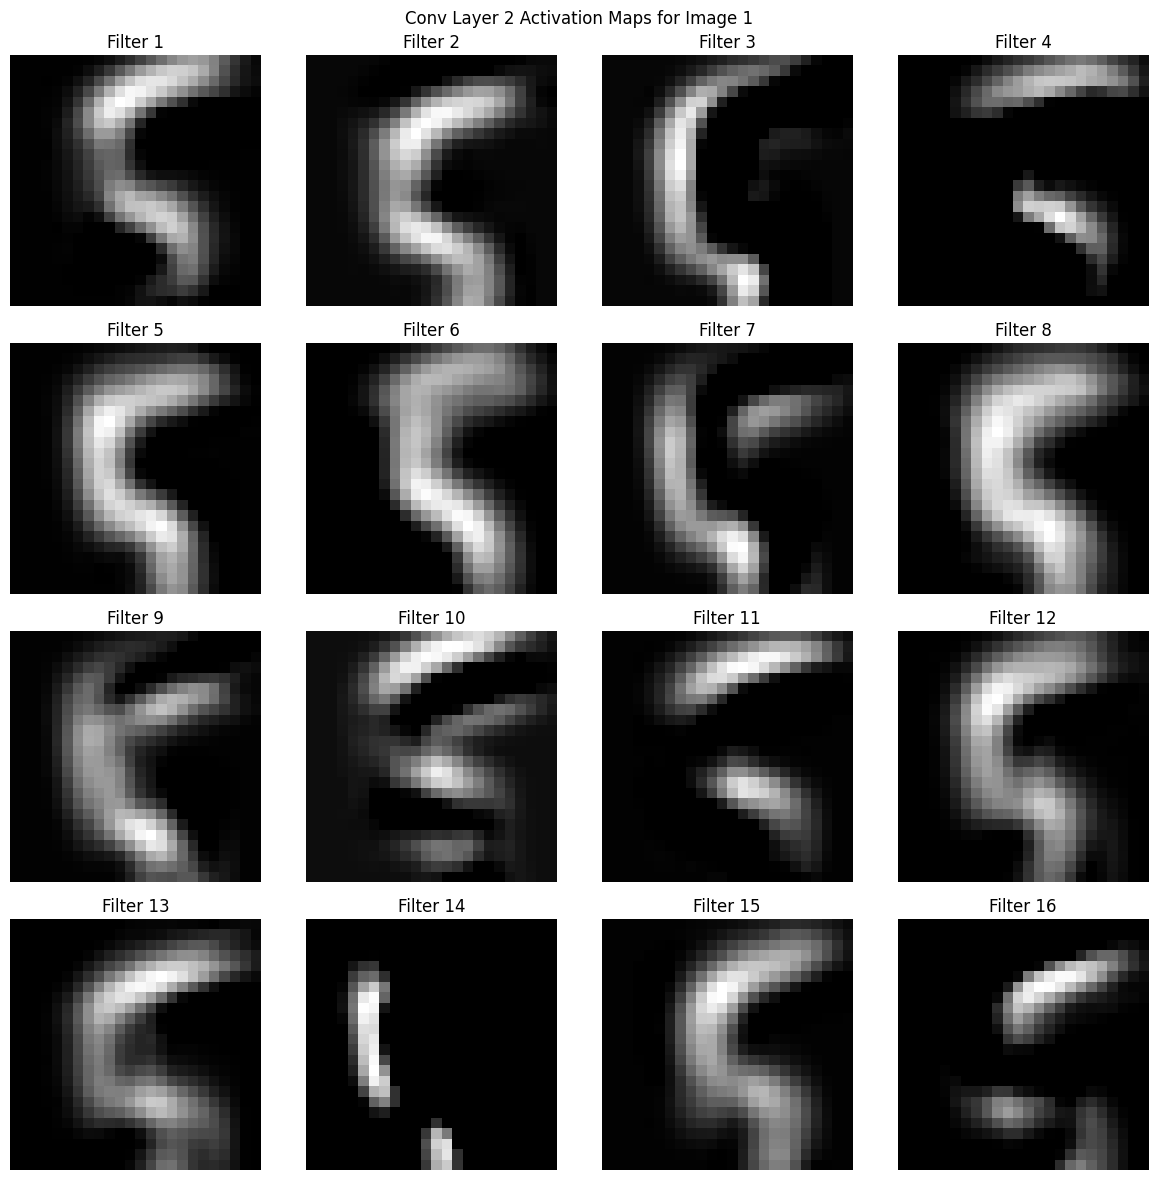

In [13]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

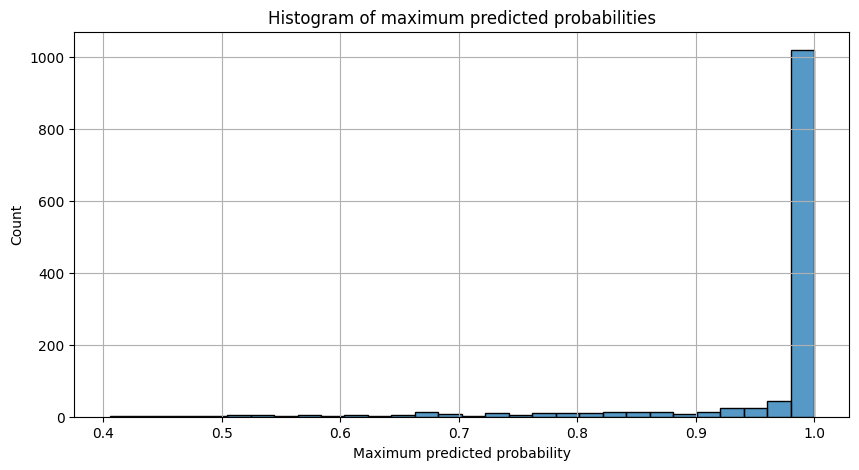

In [26]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

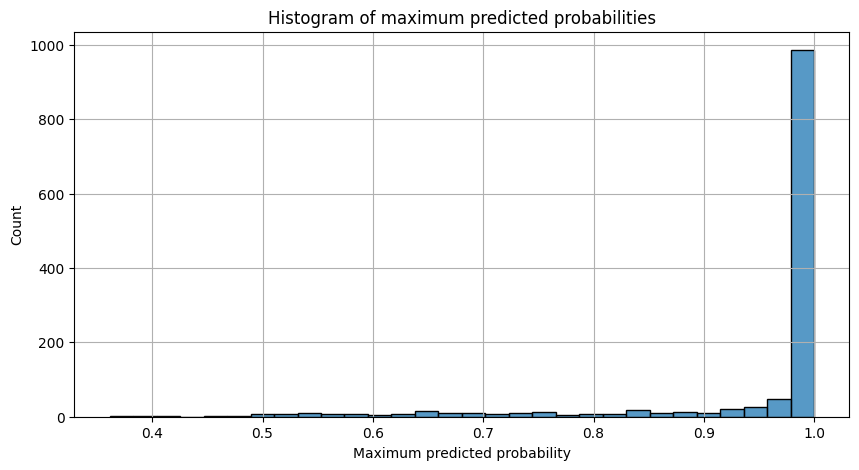

In [27]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Label Smoothing Regularization

### Training

In [29]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    label_smoothing=True,
    label_smoothing_lmbd=0.000001,
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


 33%|███▎      | 1/3 [00:26<00:52, 26.38s/it]

Accuracy of the network on the test images: 11 %
Epoch: 1


 67%|██████▋   | 2/3 [00:52<00:26, 26.45s/it]

Accuracy of the network on the test images: 10 %
Epoch: 2


100%|██████████| 3/3 [01:19<00:00, 26.44s/it]

Accuracy of the network on the test images: 10 %


### Visualization

#### Plot of Losses and Accuracies

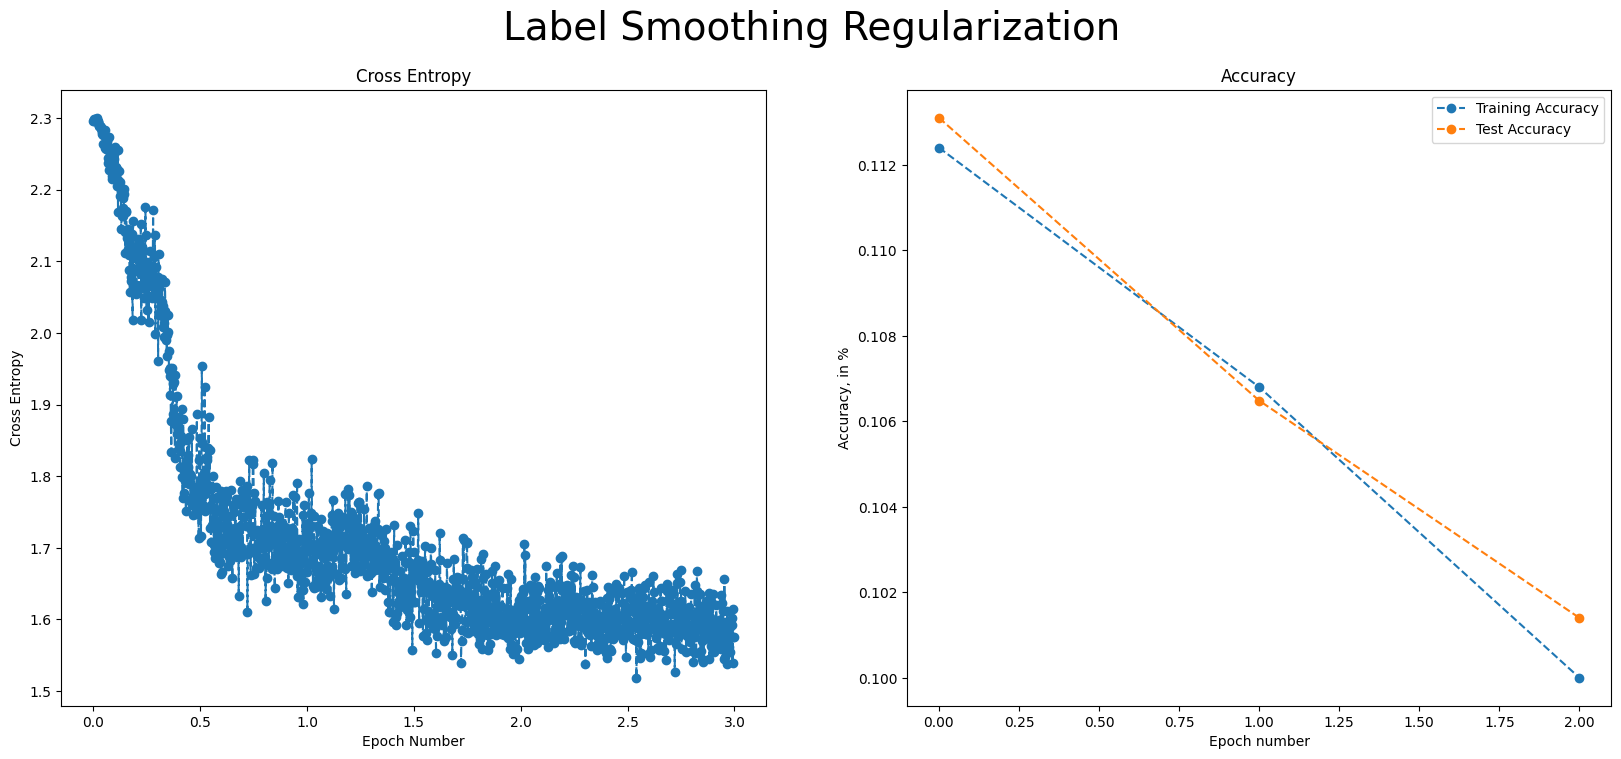

In [30]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Label Smoothing Regularization",
)

#### Plot of Weight Distributions

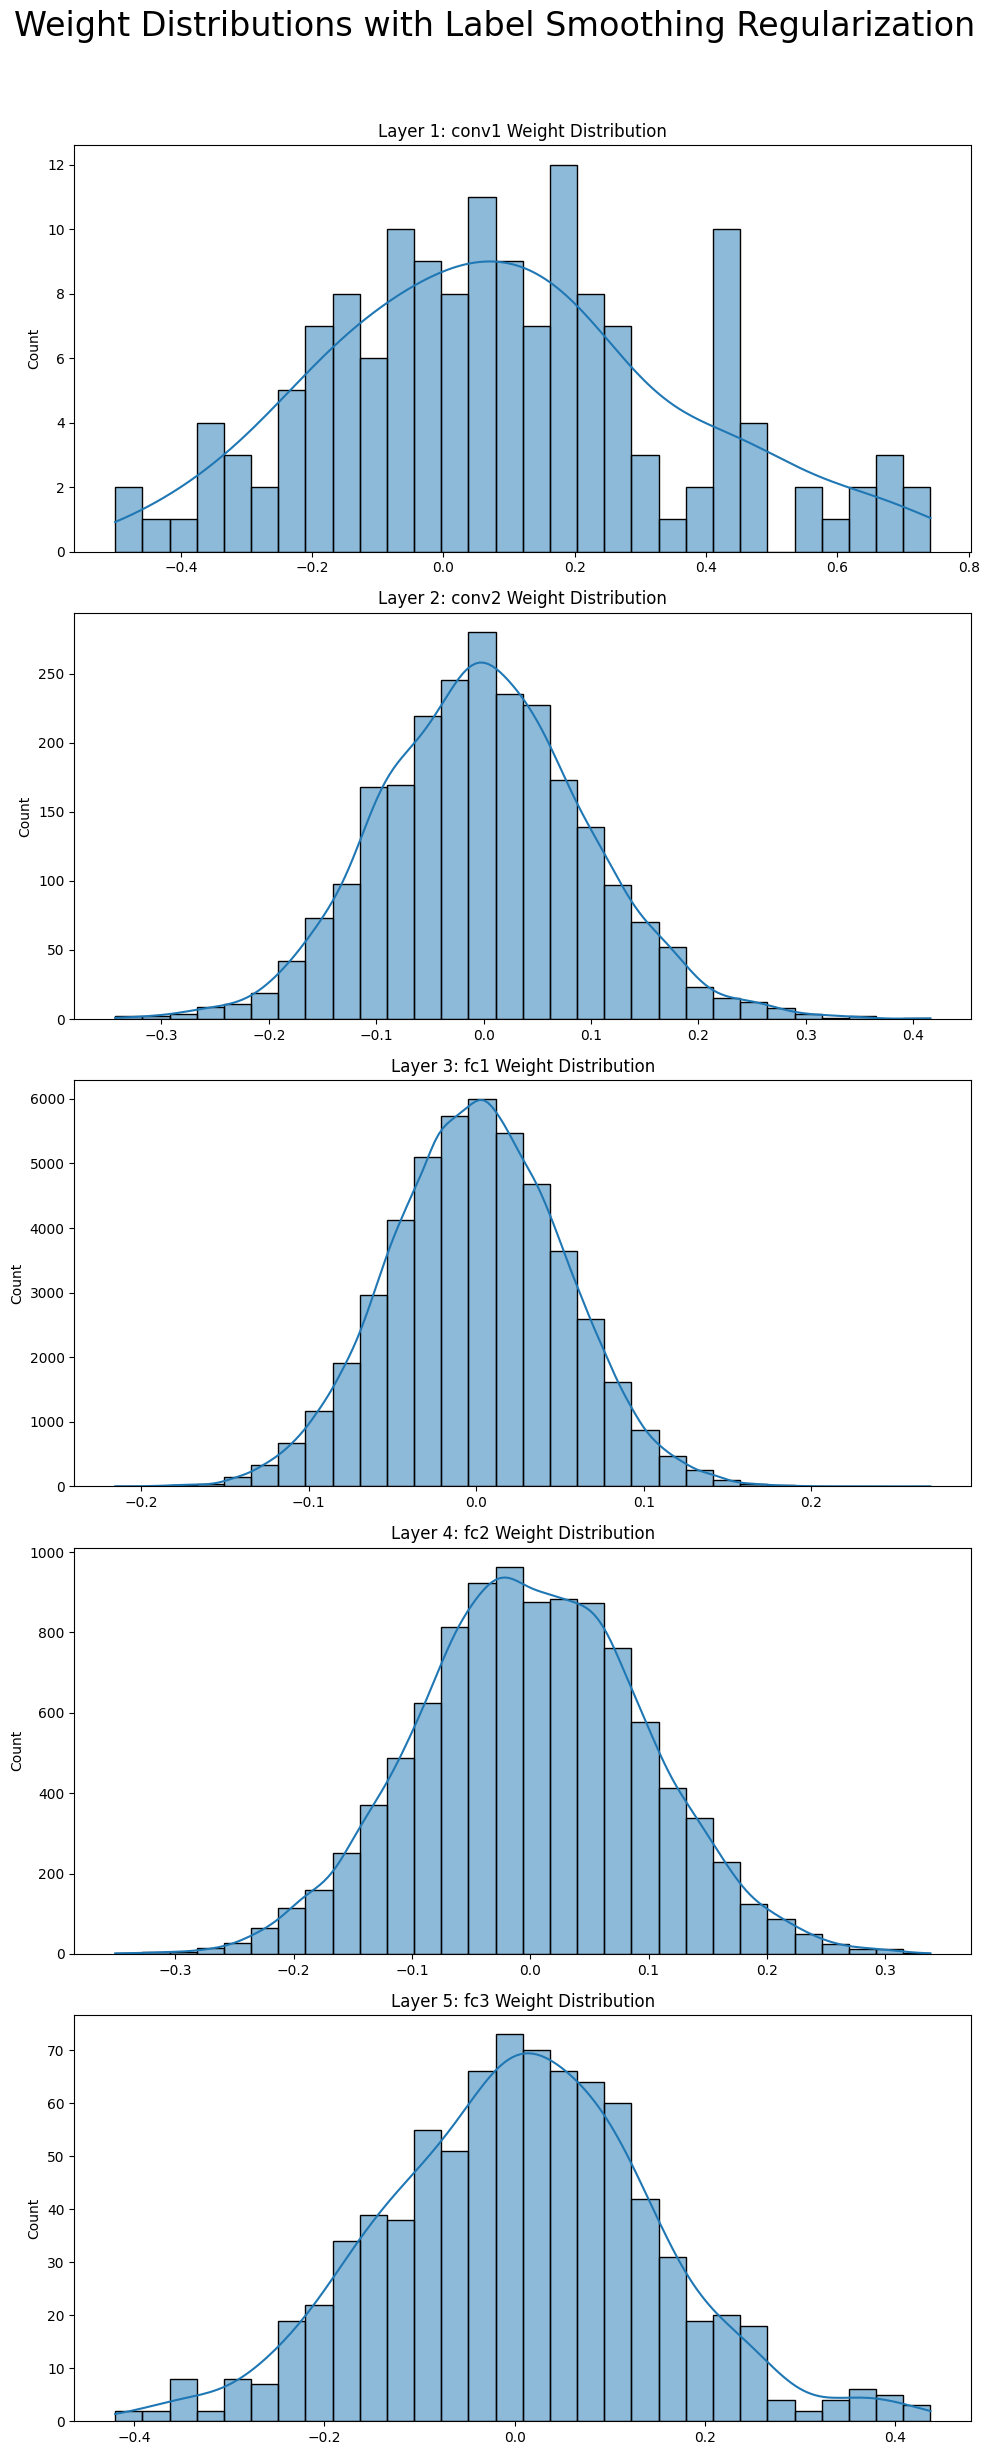

In [17]:
plot_weight_distributions(
    model, title="Weight Distributions with Label Smoothing Regularization"
)

#### Plots of Activation Maps

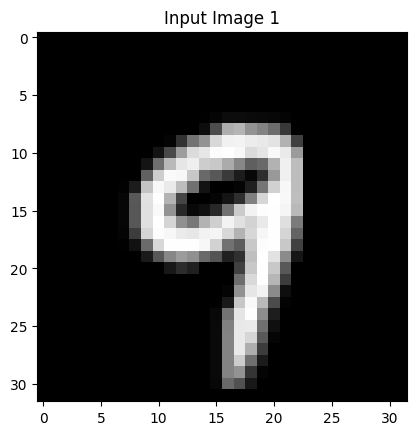

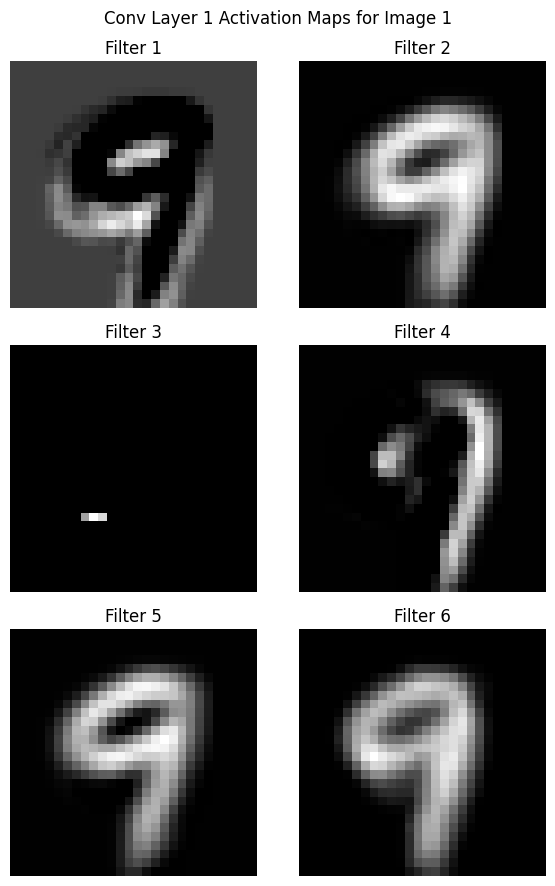

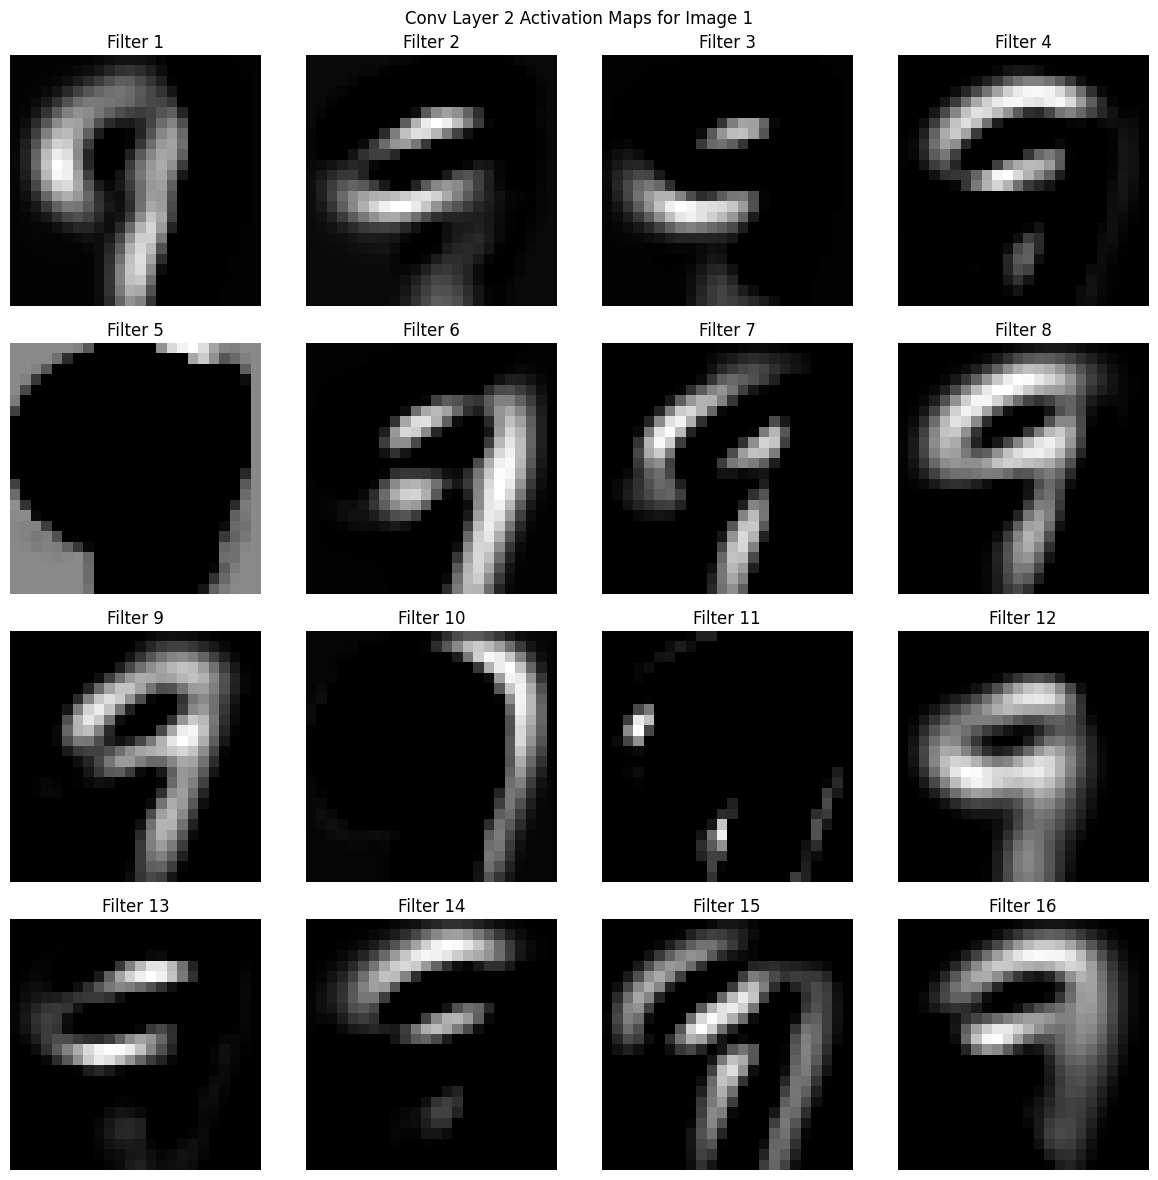

In [18]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

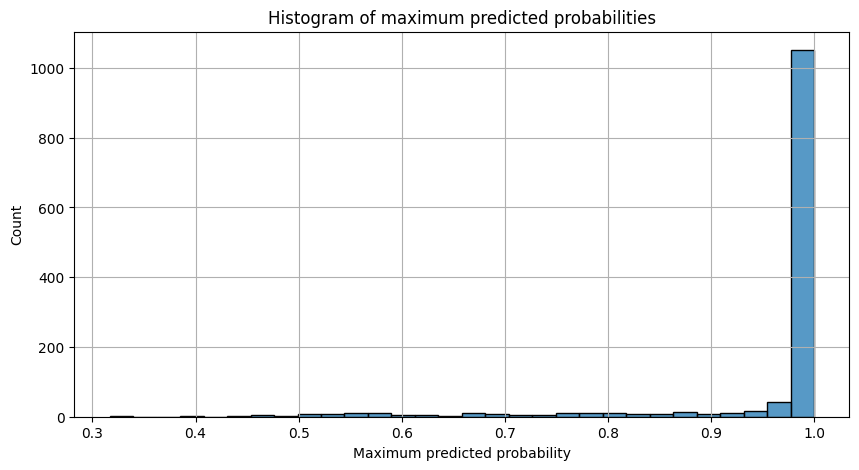

In [31]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

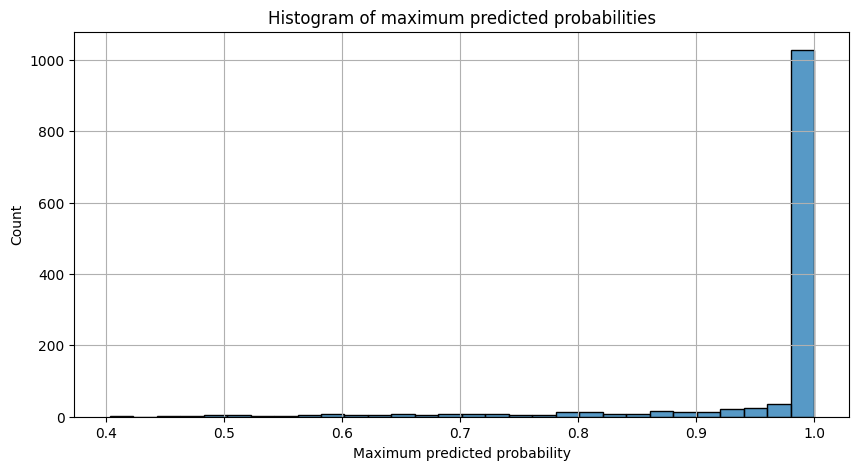

In [32]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Hessian Regularization (not working)

### Training

In [27]:
"""
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hessian_reg=True, hessian_reg_lmbd=0.001
)
"""

'\nmodel = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)\nn_epochs = 3\nlosses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(\n    train_loader, test_loader, model, n_epochs, hessian_reg=True, hessian_reg_lmbd=0.001\n)\n'

### Visualization

#### Plot of Losses and Accuracies

In [28]:
"""plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies, title="Hessian Regularization"
)"""

'plot_reg_results(\n    epochs,\n    losses,\n    reg_losses,\n    train_accuracies,\n    test_accuracies, title="Hessian Regularization"\n)'

#### Plot of Weight Distributions

In [ ]:
#plot_weight_distributions(model, title="Weight Distributions with Hessian Regularization")

#### Plots of Activation Maps

In [ ]:
#plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Noise Injection (to inputs)

### Training

In [18]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_input=True,
    noise_stddev=0.05,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:27<01:49, 27.28s/it]

Accuracy of the network on the test images: 84 %
Epoch: 1


 40%|████      | 2/5 [00:54<01:22, 27.35s/it]

Accuracy of the network on the test images: 93 %
Epoch: 2


 60%|██████    | 3/5 [01:22<00:55, 27.68s/it]

Accuracy of the network on the test images: 96 %
Epoch: 3


 80%|████████  | 4/5 [01:50<00:27, 27.86s/it]

Accuracy of the network on the test images: 96 %
Epoch: 4


100%|██████████| 5/5 [02:18<00:00, 27.68s/it]

Accuracy of the network on the test images: 96 %


### Visualization

#### Plot of Losses and Accuracies

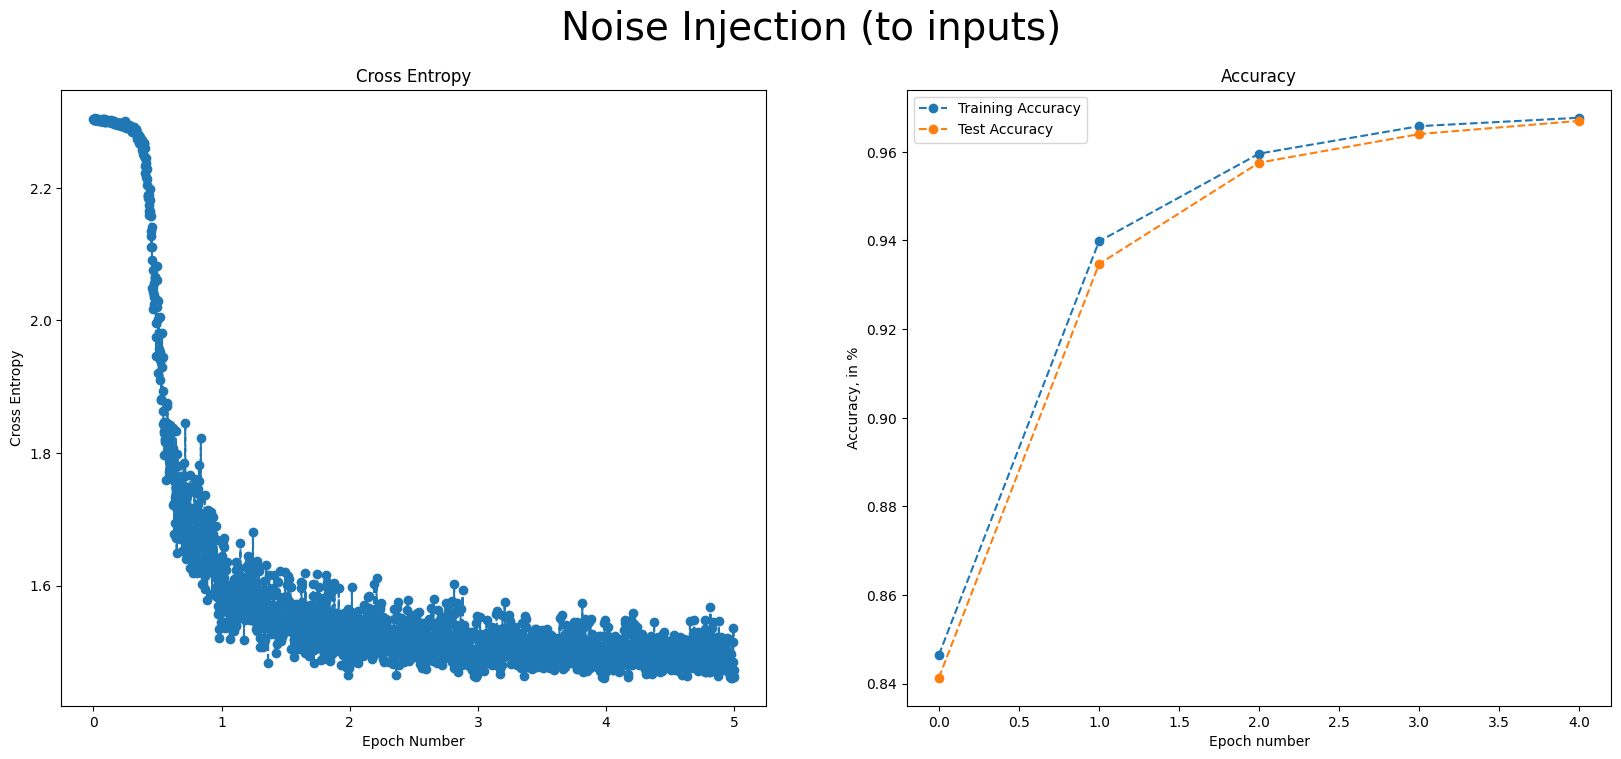

In [19]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to inputs)",
)

#### Plot of Weight Distributions

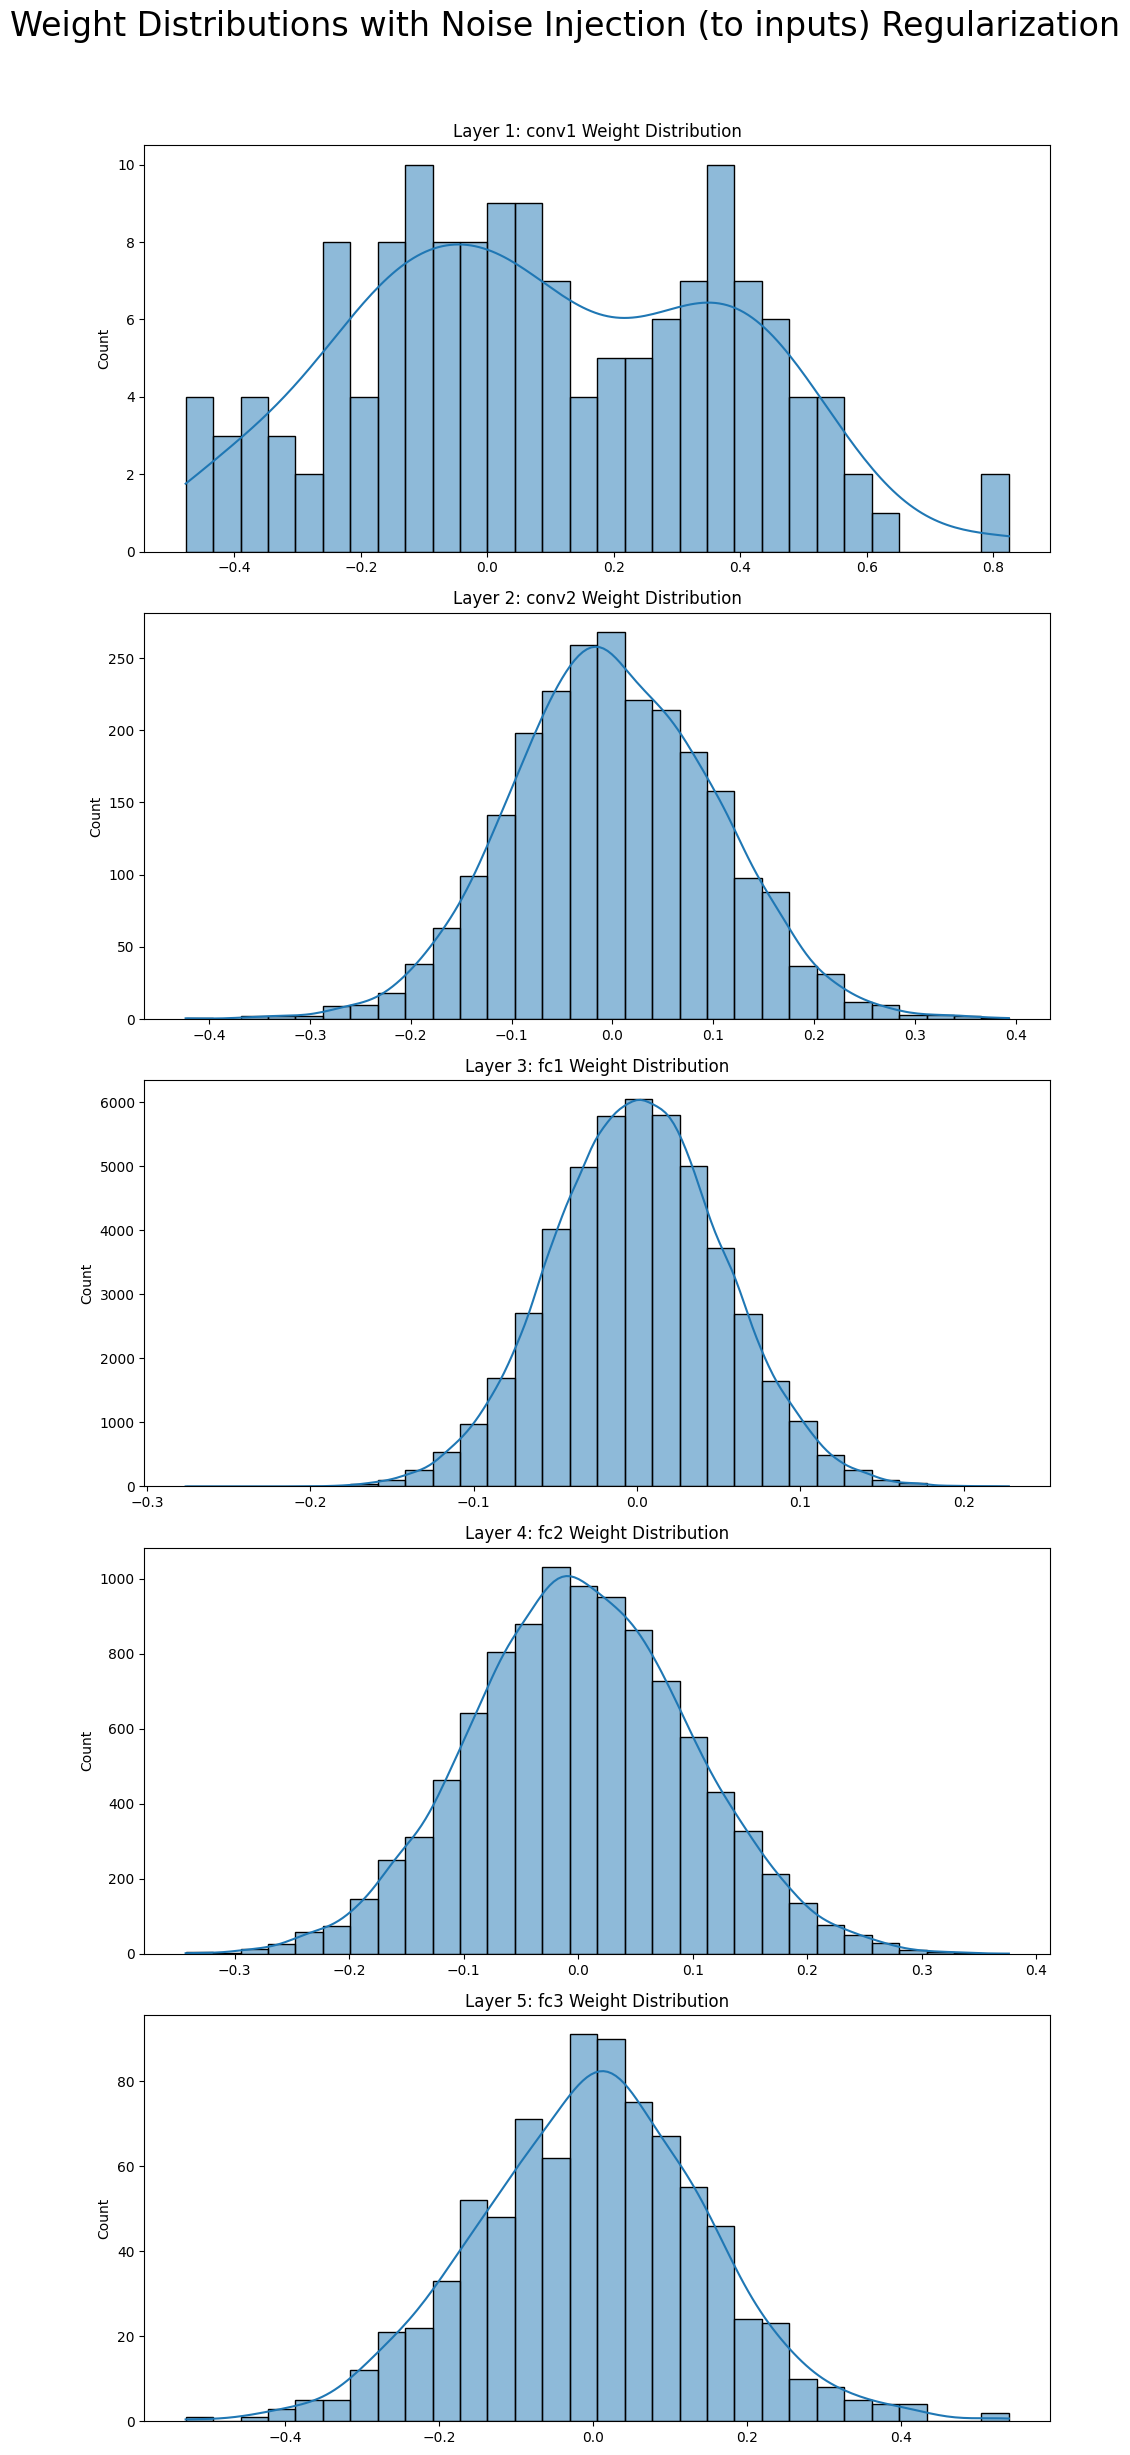

In [20]:
plot_weight_distributions(
    model, title="Weight Distributions with Noise Injection (to inputs) Regularization"
)

#### Plots of Activation Maps

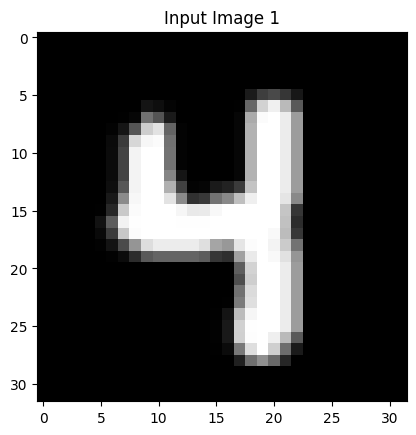

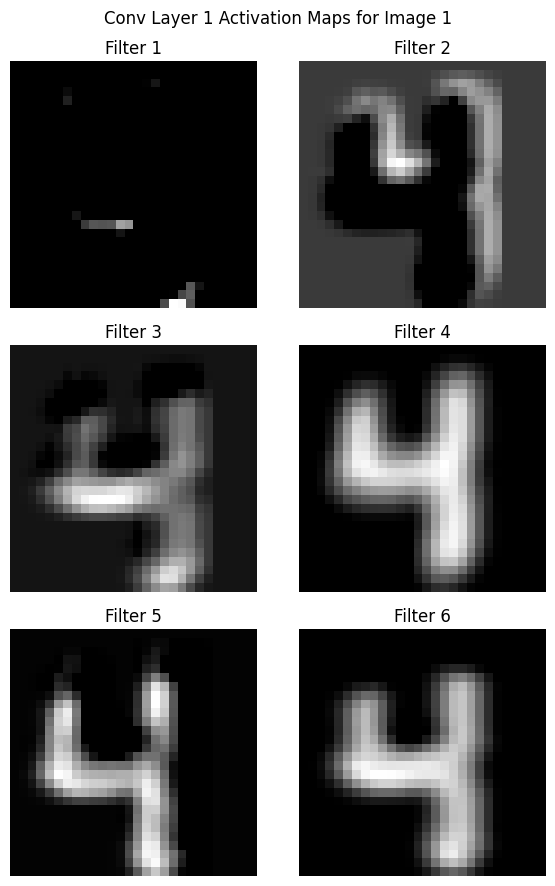

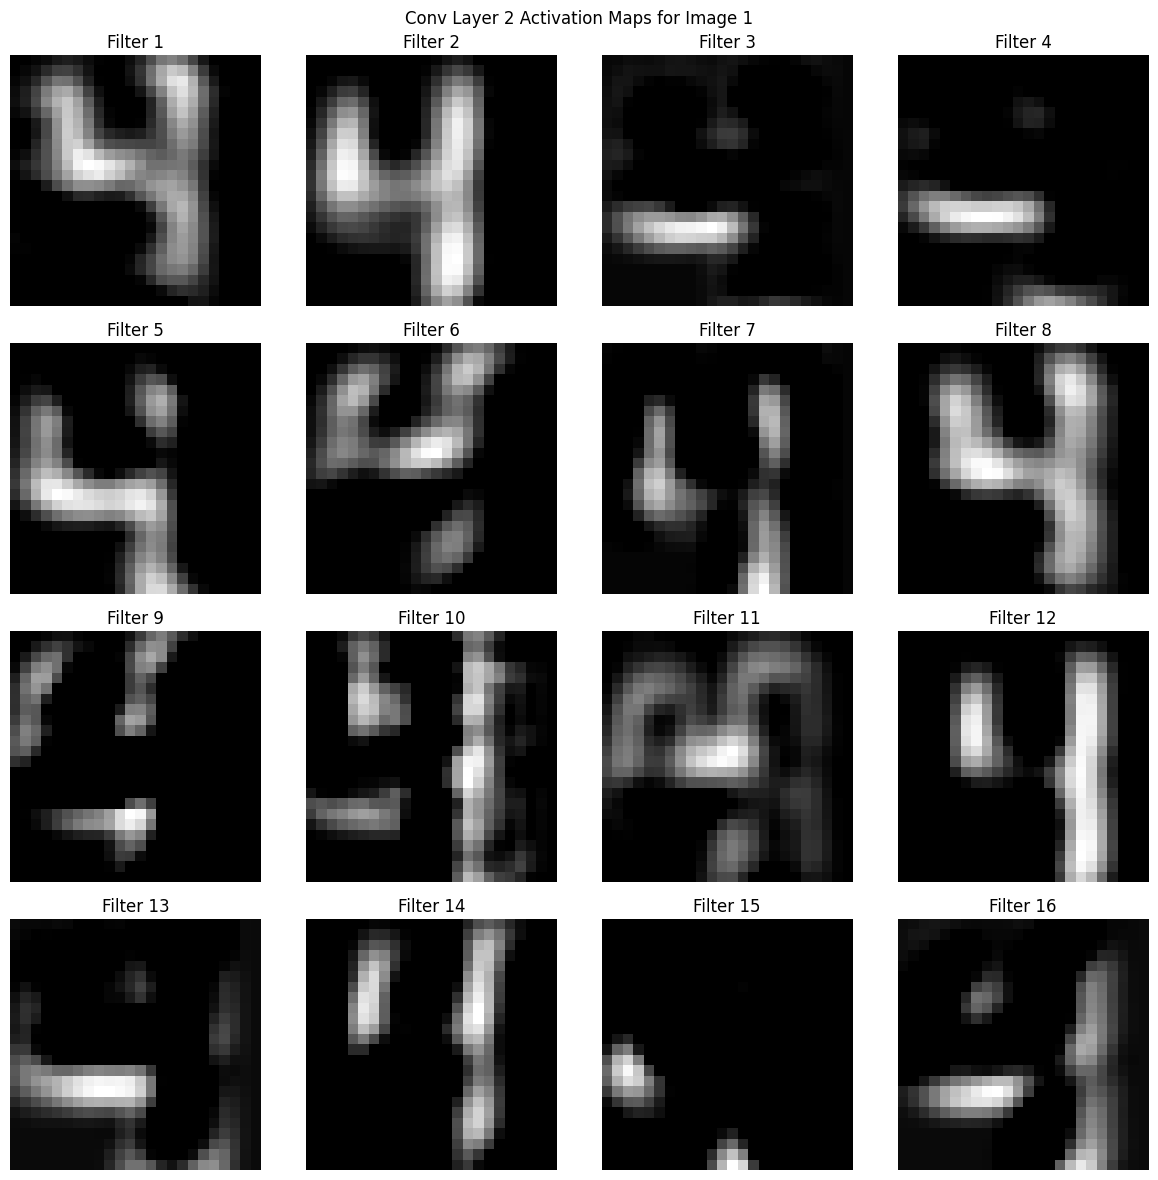

In [21]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

## Noise Injection (to weights of first convolutional layer)

### Training

In [22]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_weights=True,
    noise_stddev=0.03,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:29<01:58, 29.73s/it]

Accuracy of the network on the test images: 83 %
Epoch: 1


 40%|████      | 2/5 [01:00<01:30, 30.14s/it]

Accuracy of the network on the test images: 84 %
Epoch: 2


 60%|██████    | 3/5 [01:28<00:59, 29.52s/it]

Accuracy of the network on the test images: 95 %
Epoch: 3


 80%|████████  | 4/5 [01:57<00:29, 29.10s/it]

Accuracy of the network on the test images: 96 %
Epoch: 4


100%|██████████| 5/5 [02:24<00:00, 28.91s/it]

Accuracy of the network on the test images: 96 %


### Visualization

#### Plot of Losses and Accuracies

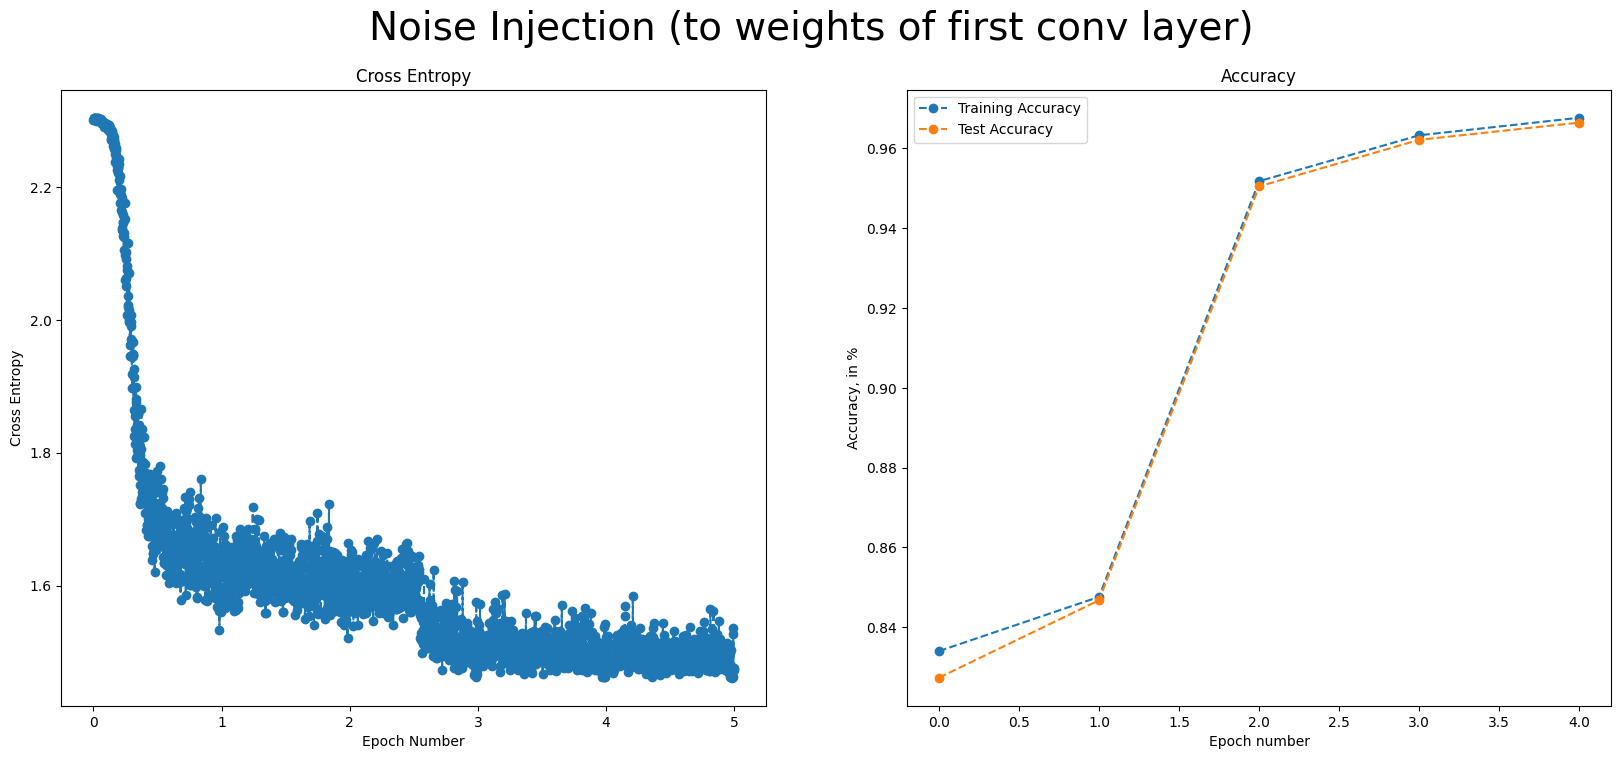

In [23]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to weights of first conv layer)",
)

#### Plot of Weight Distributions

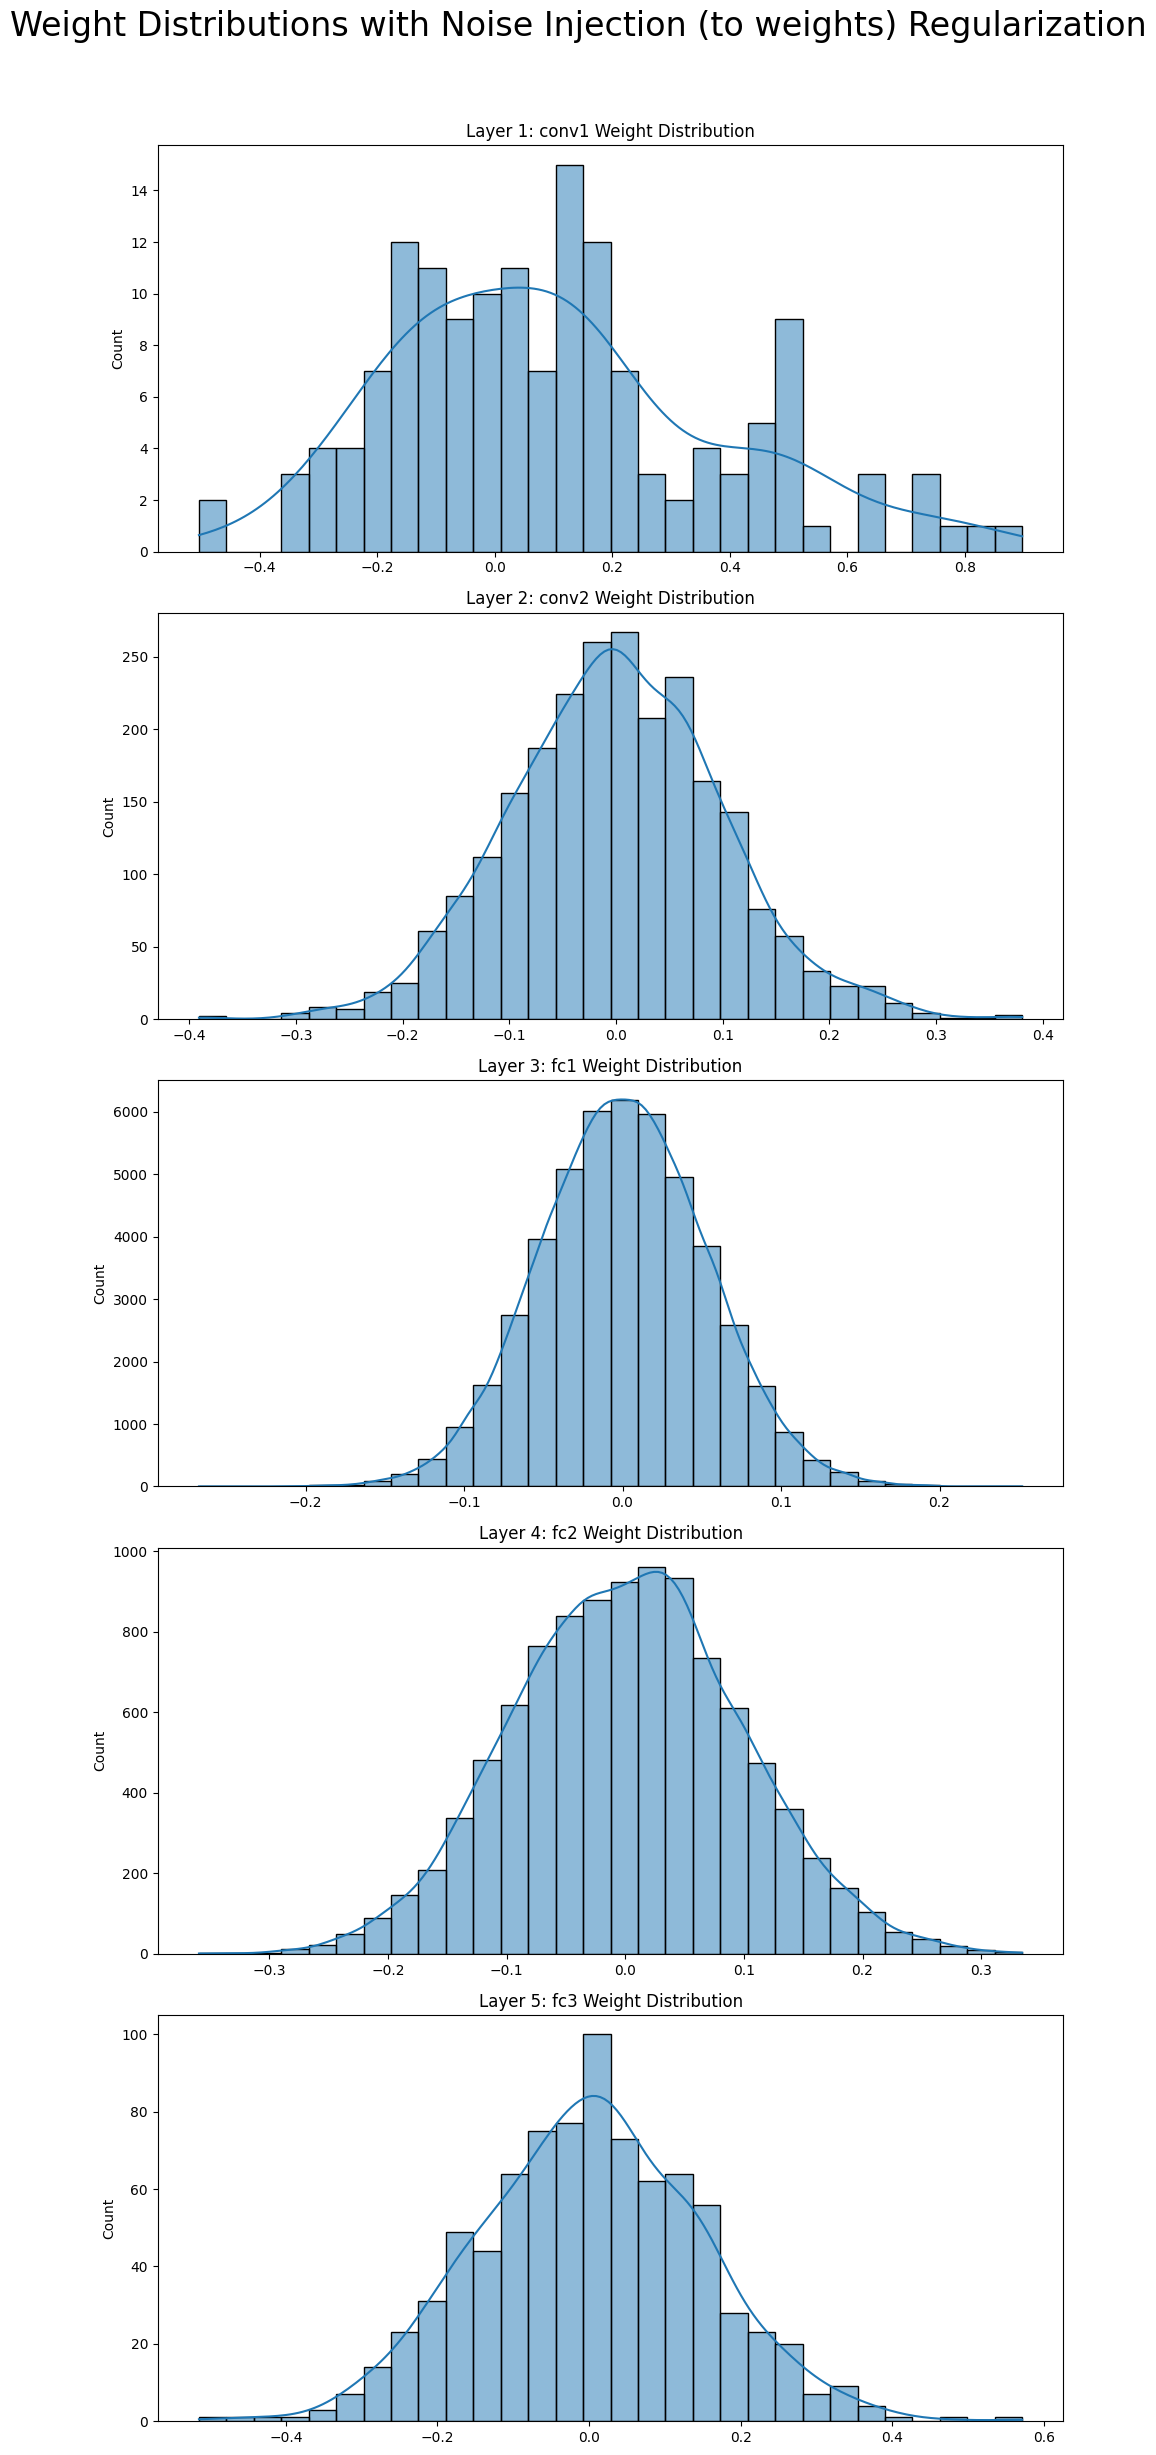

In [24]:
plot_weight_distributions(
    model, title="Weight Distributions with Noise Injection (to weights) Regularization"
)

#### Plots of Activation Maps

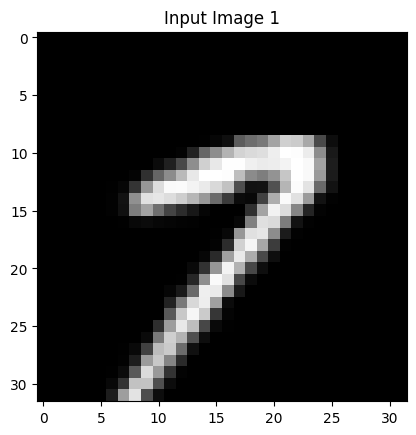

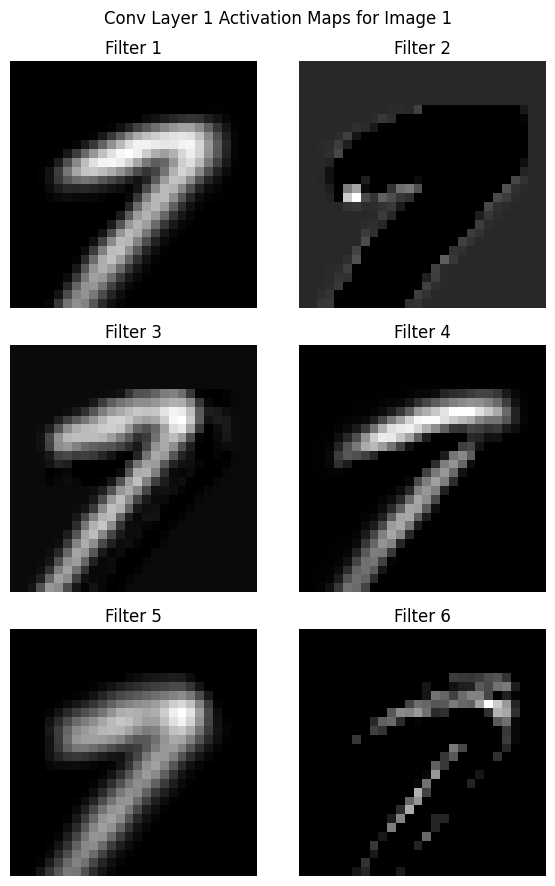

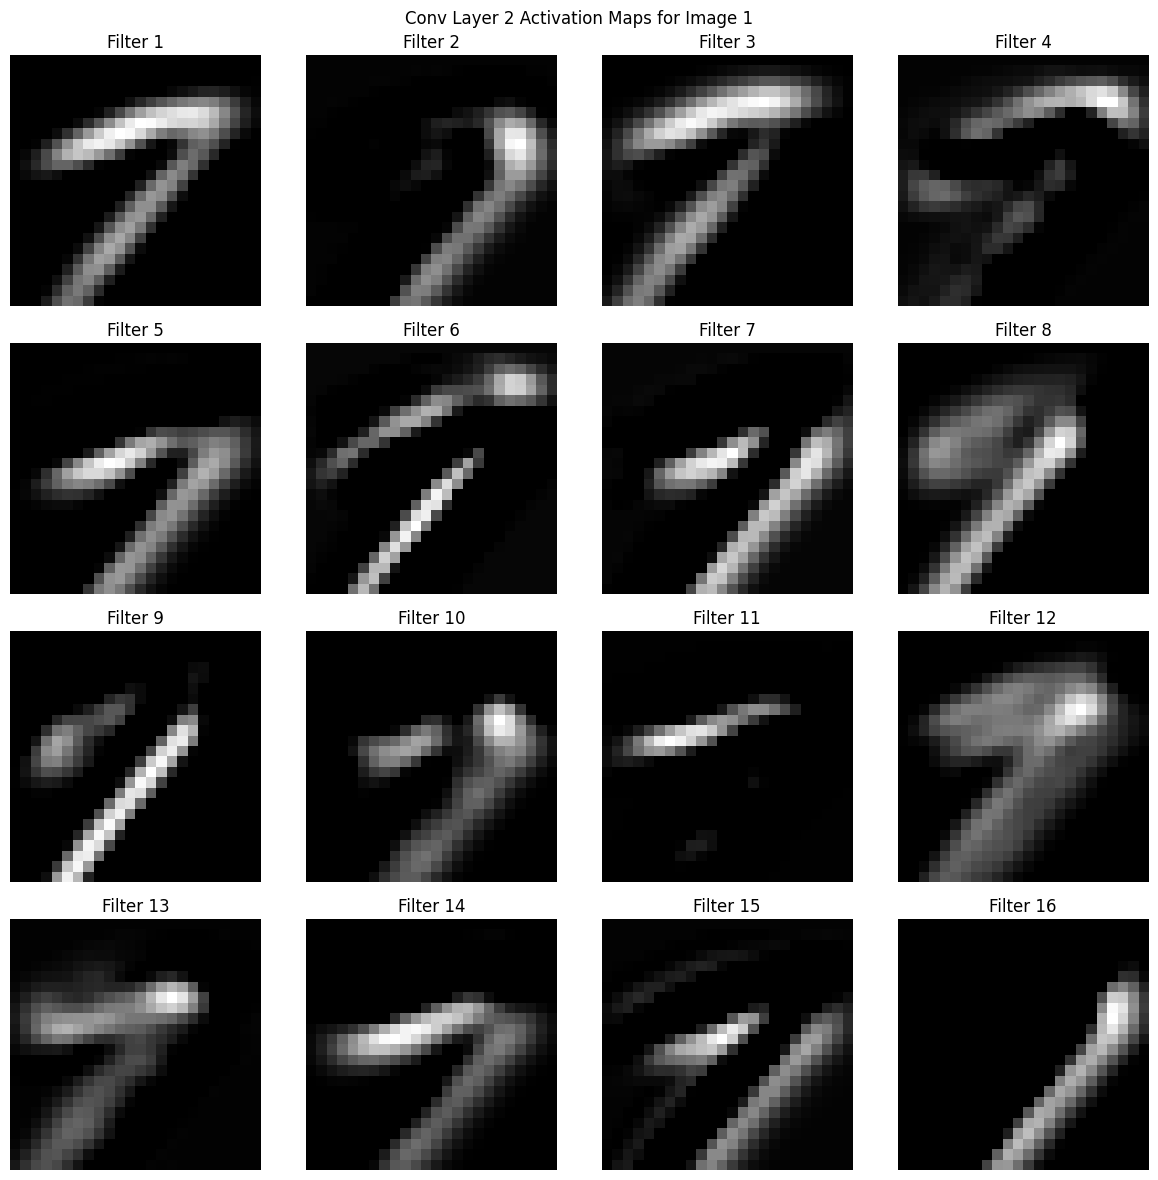

In [25]:
plot_activation_maps(model, train_loader, num_images=1)

#### Plot of Predicted Probabilities

In [ ]:
plot_predicted_probabilities(model, train_loader, num_batches=10)

In [ ]:
plot_predicted_probabilities(model, test_loader, num_batches=10)

###